#### Objective : Univariate Time Series Modelling using DARTS for model training and weight & Biases for model logging to beat the becnhmark model already provided

#### Created By : Ashwini Kumar

#### Start Date : 22th March 2022

#### Steps Involved :

    1. Read the data from the csv file and split into train and validation splits 
    
    2. Try out all the models in DARTs for "req_ThunB2B_Sorter" series
    
    3. Find out the model which gives the best performance

In [1]:
# Import the required packages 
from darts import TimeSeries
import pandas as pd
import tqdm as notebook_tqdm
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, ExponentialSmoothing, BlockRNNModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, SunspotsDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries
import wandb ## Function for weights and biases
import plotly
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, ExponentialSmoothing, BlockRNNModel,NBEATSModel,TransformerModel,AutoARIMA,TFTModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, SunspotsDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.models import TCNModel, RNNModel
from darts.models import FFT, AutoARIMA, ExponentialSmoothing, Prophet, Theta
import os
# Remove Noise using the Gaussian Wave
import pandas as pd
from sklearn.gaussian_process.kernels import ExpSineSquared, RBF
from darts.models import GaussianProcessFilter

from darts.models.forecasting.regression_model import RegressionModel

In [2]:
os.getcwd()

'C:\\Users\\ashwini.kumar\\Time_Series_Modelling\\Codes'

In [3]:
# Function to read the csv file from given location & parse datetime properly
def load_dataframe(filename):
    df = pd.read_csv(filename)
    df["Date"] = pd.to_datetime(df["Date"])
    return df

# Function create the Time Series from Dataframe using a Time Series to df function
def df_to_timeseries(df,time_column, timeseries):
    series = TimeSeries.from_dataframe(df, time_column,timeseries)
    return (series)

# Define the Mean Absolute Error for evaluating our model
from darts.metrics import mae,mape
def eval_error(actual_values,pred_values):
    return mae(actual_values,pred_values)

# Call the function to read the data properly

df = load_dataframe("C:\\Users\\ashwini.kumar\\Time_Series_Modelling\\_Final_master_df_2022_2017_v9_with_Bolzano-sales_joined.csv")
df.tail(5)




Date  RequestedQTY  GoodsIssuedQTY  InvoicedQTY  PDO number  \
262 2022-01-10      221296.0        207206.0     204987.0       19234   
263 2022-01-17      228793.0        216200.0     213003.0       20996   
264 2022-01-24      189622.0        183157.0     181178.0       17999   
265 2022-01-31      204633.0        168407.0     165464.0       19322   
266 2022-02-07      175732.0        169088.0     167488.0       12076   

     req_Illy  req_Teddy  req_Thun  req_other  inv_Illy  ...  \
262     26127      36129  148757.0       5500     23820  ...   
263     29304      11272  178335.0       4366     26078  ...   
264     22592      17737  140180.0       3444     20612  ...   
265     33245      24936  140112.0       1112     30262  ...   
266     16378       1877  154618.0        141     14741  ...   

     BOL_B2B Sorter BVB Thun  BOL_B2B Sorter riassortimenti WHS  BOL_B2C Thun  \
262                  15500.0                            22500.0       23000.0   
263                   3000.0                            18000.0       20000.0   
264                      NaN                            27000.0       20000.0   
265                  11000.0                            18000.0       17500.0   
266                      NaN                            18900.0       14000.0   

     BOL_B2C Sorter Thun  BOL_B2C P2L Thun  BOL_Inbound Thun  SO_QTY_20210315  \
262              20700.0            2300.0            1500.0          12604.0   
263              18000.0            2000.0            1500.0              0.0   
264              18000.0            2000.0            1500.0              0.0   
265              16000.0            1500.0            1500.0              0.0   
266              13000.0            1000.0            1500.0              0.0   

     SO_QTY_20210607  SO_QTY_20210830  SO_QTY_20211122  
262          12715.0          13396.0          15300.0  
263              0.0              0.0              0.0  
264              0.0          37525.0          40976.0  
265              0.0              0.0              2.0  
266              0.0            252.0           3073.0  

[5 rows x 65 columns]

In [4]:
# train_series = ["req_ThunB2B_Sorter", "req_ThunB2C","req_ThunB2B_AA", "req_ThunB2B_PP" ]
# benchmark_series = ["BOL_B2B Sorter Thun", "BOL_B2C Thun","BOL_B2B AA Thun", "BOL_B2B P&P Thun"]

In [5]:
df['Sum_All_Variables'] = df["req_ThunB2B_Sorter"] + df ["req_ThunB2C"] + df["req_ThunB2B_AA"] + df["req_ThunB2B_PP"]
df['Sum_All_Variables_Benchmark'] = df["BOL_B2B Sorter Thun"] + df ["BOL_B2C Thun"] + df["BOL_B2B AA Thun"] + df["BOL_B2B P&P Thun"]

# Run on Raw TimeSeries & test all model

Running for  Sum_All_Variables


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Call the training function
Running for : AutoARIMA
Fitting the Model with Deafults Params : Auto-ARIMA
Benchmark Loss is : 51986.81034482759
Model Predict Loss is : 81706.06753744195


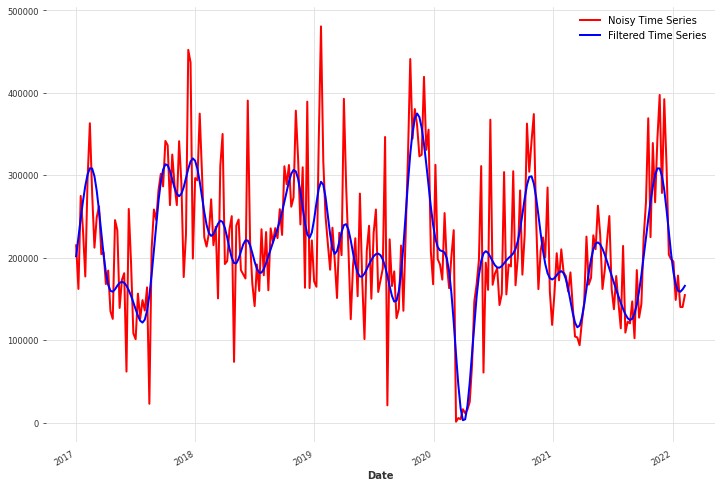

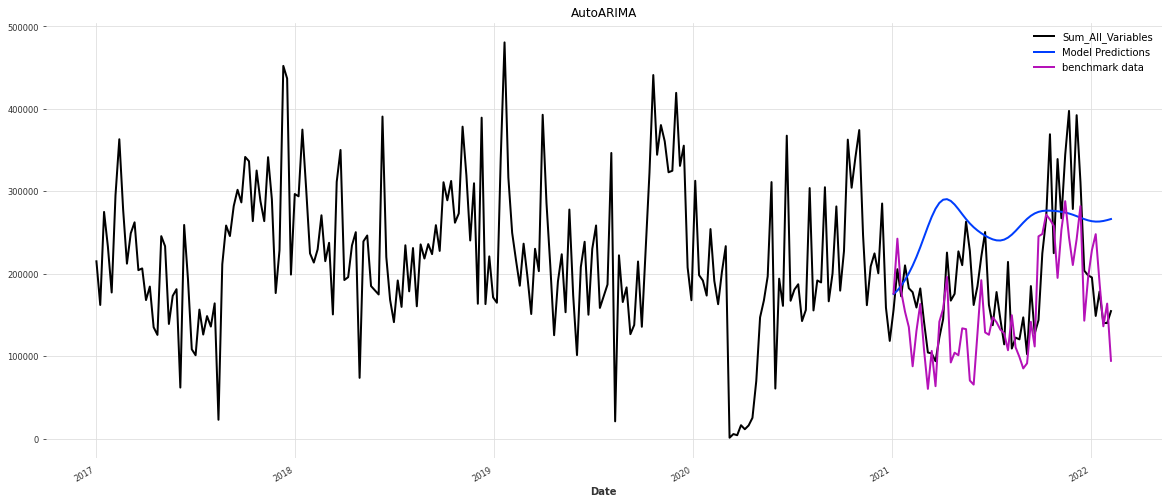

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Running for : Prophet
Fitting the Model with Deafults Params : Prophet
Benchmark Loss is : 51986.81034482759
Model Predict Loss is : 47985.11959698854


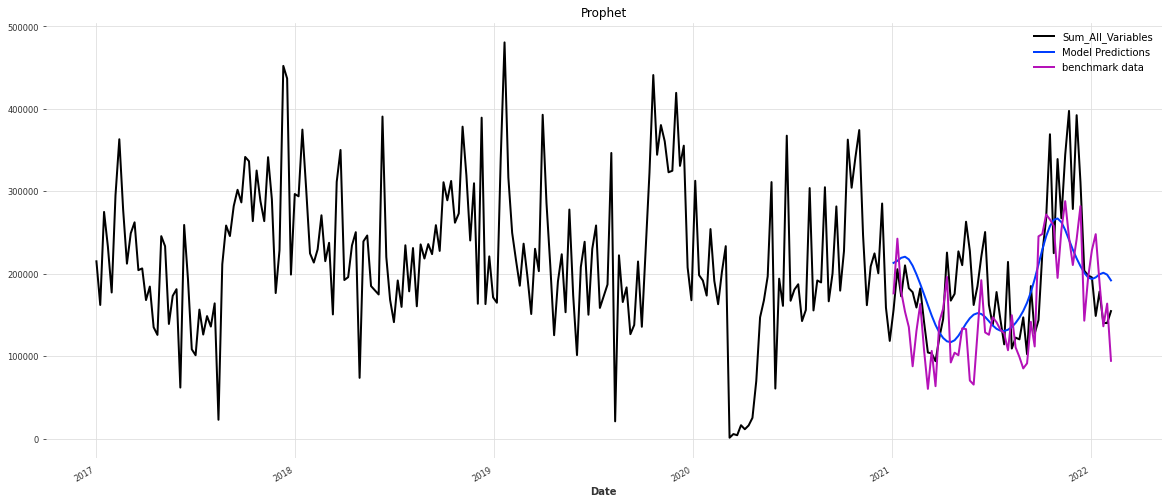

Running for : ExponentialSmoothing
Fitting the Model with Deafults Params : ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None
Benchmark Loss is : 51986.81034482759
Model Predict Loss is : 97534.42433989303


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


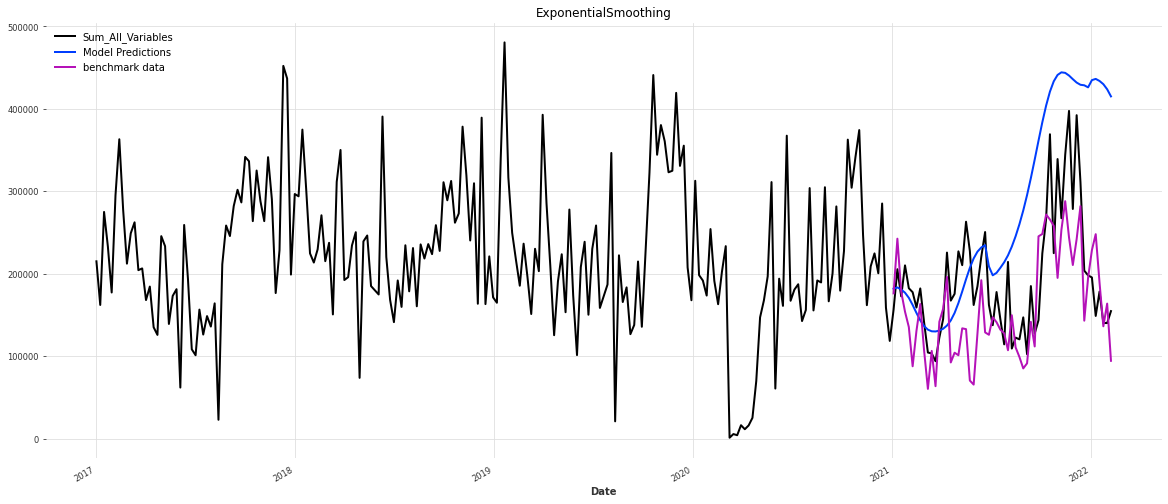

Running for : FFT
Fitting the Model with Deafults Params : FFT(nr_freqs_to_keep=10, trend=None)
Benchmark Loss is : 51986.81034482759
Model Predict Loss is : 75903.06368381903


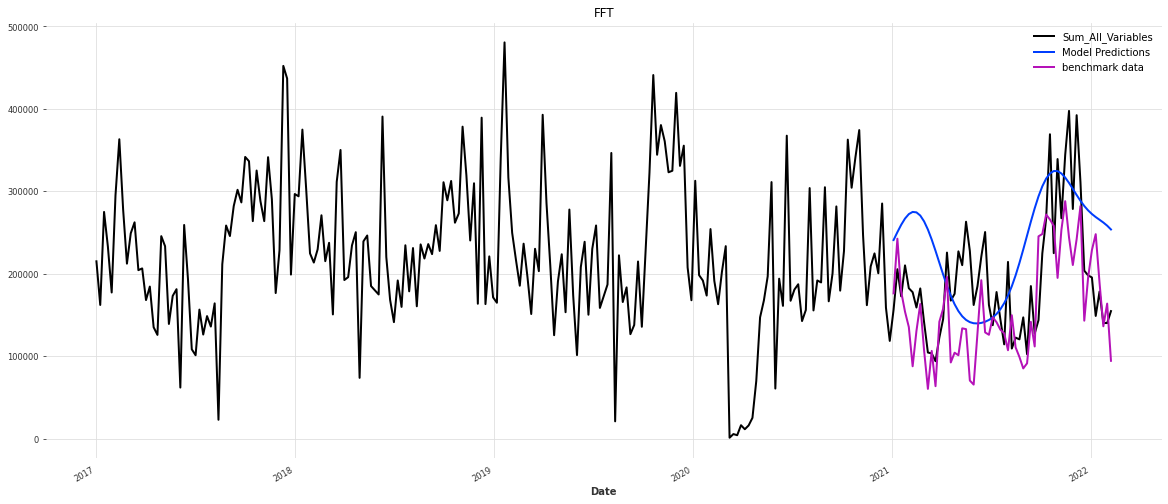

[2022-04-24 12:55:03,438] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
[2022-04-24 12:55:03,438] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 185 samples.
[2022-04-24 12:55:03,445] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-24 12:55:03,445] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type    | Params
--------------------------------------
0 | criterion | MSELoss | 0     
1 | rnn       | RNN     | 700   
2 | V         | Linear  

Running for : RNNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.rnn_model.RNNModel object at 0x000001CA6B2D6B48>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 51986.81034482759
Model Predict Loss is : 194000.63050679115


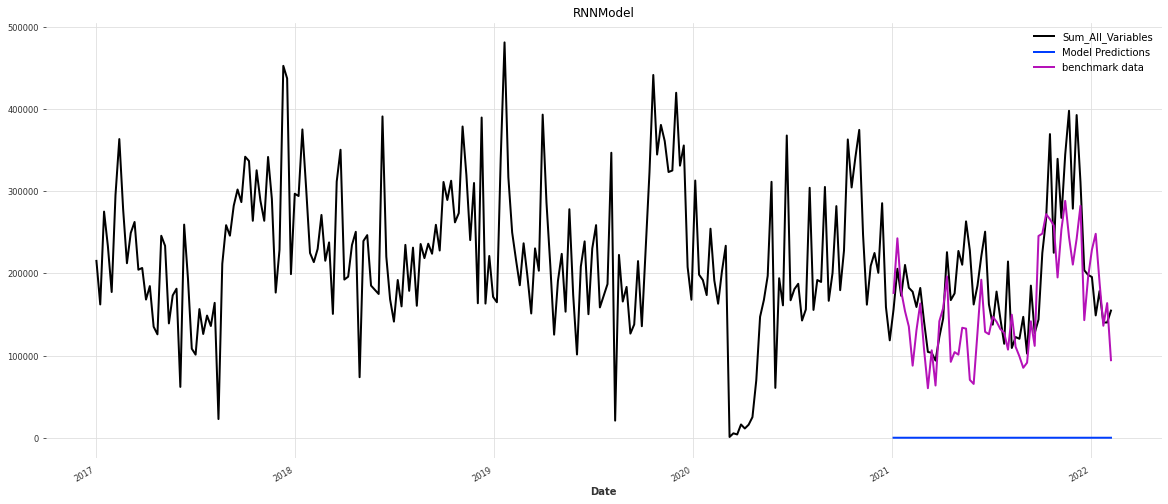

[2022-04-24 12:55:19,109] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-04-24 12:55:19,109] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-04-24 12:55:19,115] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
[2022-04-24 12:55:19,115] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
INFO:darts.models.forecasting.tcn_model:Number of layers chosen: 4
[2022-04-24 12:55:19,121] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-24 12:55:19,121] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available

Running for : TCNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.tcn_model.TCNModel object at 0x000001CA6B2D8908>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 51986.81034482759
Model Predict Loss is : 63071.12395979928


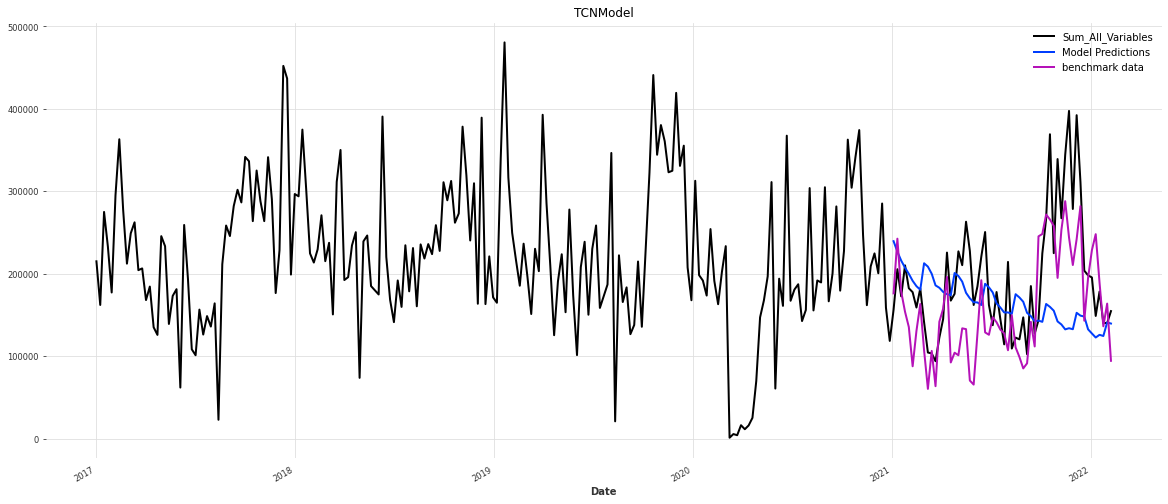

[2022-04-24 12:55:41,800] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-04-24 12:55:41,800] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-04-24 12:55:41,897] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-24 12:55:41,897] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type       | Params
-----------------------------------------
0 | criterion | MSELoss    | 0     
1 | stacks    | ModuleList | 6.3 M 
------------

Running for : NBEATSModel
Fitting the Model with Deafults Params : <darts.models.forecasting.nbeats.NBEATSModel object at 0x000001CA5BA2FA88>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 51986.81034482759
Model Predict Loss is : 73559.34113671987


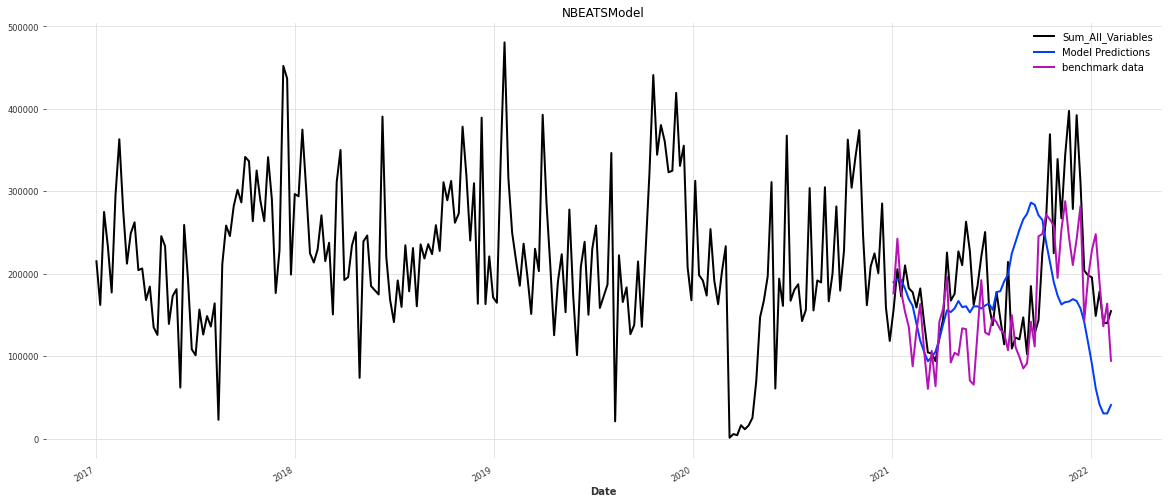

[2022-04-24 12:58:08,999] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-04-24 12:58:08,999] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-04-24 12:58:09,021] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-24 12:58:09,021] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             

Running for : TransformerModel
Fitting the Model with Deafults Params : <darts.models.forecasting.transformer_model.TransformerModel object at 0x000001CA5BA3A748>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 51986.81034482759
Model Predict Loss is : 193821.22829474398


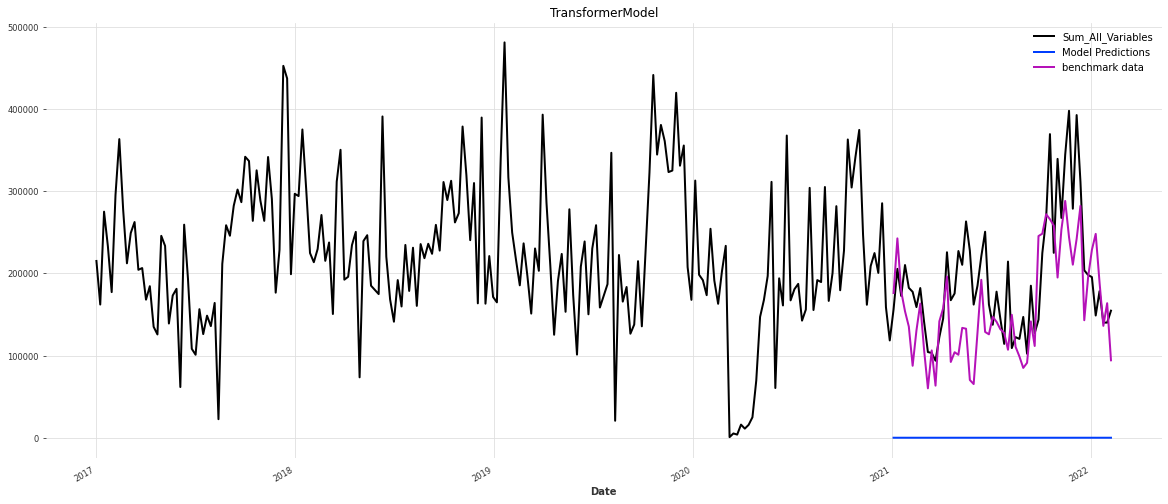

In [7]:
# Initialize the product details
import matplotlib.pyplot as plt
# Define the train function with Wandb Logging properly
def train(series_name):
    
    ## Create the directory  for our files
          try:
            os.makedirs("C:\\Users\\ashwini.kumar\\Time_Series_Modelling\\Outputs\\" + series_name + 'filtered')
          except OSError:
            pass
    
        # Define an empty Dataframe
          df = pd.DataFrame()
 # your model training code here
#           for num, model_type in enumerate([AutoARIMA(), Prophet()]):

#           for num,model_type in enumerate([ Prophet()]):

#           for num,model_type in enumerate([RegressionModel(lags=24)
#                            ]):
          

          for num,model_type in enumerate([AutoARIMA(), Prophet(), ExponentialSmoothing(),  FFT(),
                              RNNModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0),
                              TCNModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0),
                              NBEATSModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0),
                              TransformerModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0)
                           ]):
        
#             list_model_names = ["Regression_Model"]
        
            list_model_names = ["AutoARIMA", "Prophet", "ExponentialSmoothing",  "FFT",
                              "RNNModel",
                              "TCNModel",
                              "NBEATSModel",
                              "TransformerModel"]

            
            print ("Running for :",list_model_names[num])
#             print (str(model_type))
            model = model_type
            print ("Fitting the Model with Deafults Params :",model_type)
            # Fit the model on training data 
            model_req = model.fit(train_data)
            #Make the prediction for 58 observation on train Data
            pred_air = model_req.predict(n = 58)
            
#             print (pred_air)
            # Predict the data for Backtesting
#             if num <= 4:
#                 pred_backtest = model.historical_forecasts(timeseries_input,
#                   start=pd.Timestamp("2020-12-28"),  forecast_horizon=4)
#             else:
#                 pred_backtest = model.historical_forecasts(timeseries_input,
#                   start=pd.Timestamp("2020-12-28"),  forecast_horizon=8, retrain=False)
#             print (pred_backtest)
#             print (len(pred_backtest))
            # Calculate the loss off model
            loss_model = mae(val_data , pred_air)
            #Calculate the loss of bencmark model
            loss_benchmark = mae(val_data, benchmark_data)
            # Calculate the loss off backtesting
#             loss_backtesting = mae(val_data,pred_backtest)
            # Print the loss function for benchmark data
            print ("Benchmark Loss is :", loss_benchmark) 
            # Print the loss function for benchmark data
            print ("Model Predict Loss is :", loss_model)      
            # Print the loss function for benchmark data
#             print ("Model Backtest Loss is :", loss_backtesting)  
            ## Add values to Dataframe
            df.loc[num, 'model'] = model_type
            df.loc[num,'loss_benchmark'] = loss_benchmark
#             df.loc[num,'loss_backtesting'] = loss_backtesting
            df.loc[num,'loss_model'] = loss_model
            # Initialize the plotting variables
            
            df.to_csv("C:\\Users\\ashwini.kumar\\Time_Series_Modelling\\Outputs\\" + series_name + 'filtered' + "\\valid_data.csv")
            plt.figure() 
            # Set the image size
            plt.rcParams["figure.figsize"] = (20,8)
            # Plot the actual time series data
            timeseries_input.plot()
            # Plot the prediction made
            pred_air.plot(label='Model Predictions', low_quantile=0.05, high_quantile=0.95)
            benchmark_data.plot(label='benchmark data', low_quantile=0.05, high_quantile=0.95)
#             pred_backtest.plot(label='Backtesting Predictions', low_quantile=0.05, high_quantile=0.95)
            plt.legend()
            plt.title(list_model_names[num])
            
            plt.savefig("C:\\Users\\ashwini.kumar\\Time_Series_Modelling\\Outputs\\" + series_name + 'filtered' + "\\" + str(list_model_names[num]) + '.png')
            plt.show()





# The function to define the train_data input data and other functions
def call_timeseries(train_column,benchmark_column):
    timeseries_input = df_to_timeseries(df,"Date",train_column)
#     print (timeseries_input)

    benchmark_input = df_to_timeseries(df,"Date",benchmark_column)
    # Set aside the data since 2021 
    
    kernel = ExpSineSquared()
    # kernel = RBF()

    gpf = GaussianProcessFilter( kernel=kernel, alpha=0.4 / 2, n_restarts_optimizer=100)
    
    filtered_x = gpf.filter(df_to_timeseries(df,"Date",train_column))
                            
    plt.figure(figsize=[12, 8])
    timeseries_input.plot(color="red", label="Noisy Time Series")
    filtered_x.plot(color="blue", label="Filtered Time Series")
    plt.legend()
#     plt.savefig(series_name + 'filtered' + "/" + train_column + '.png')

    train_data , val_data_filtered = filtered_x.split_before(pd.Timestamp('2021-01-04'))

    train_data_noisy, val_data = timeseries_input.split_before(pd.Timestamp('2021-01-04'))

    train_benchmark_ignore, benchmark_data = benchmark_input.split_before(pd.Timestamp('2021-01-04'))
    
    return train_data,val_data,benchmark_data,timeseries_input


train_series = ['Sum_All_Variables'  ]
benchmark_series = ['Sum_All_Variables_Benchmark' ]

# train_series = ['Sum_All_Variables' ]
# benchmark_series = ['Sum_All_Variables_Benchmark']


for i in range(len(train_series)):
    
    print ("Running for " , train_series[i])
    train_data,val_data,benchmark_data,timeseries_input = call_timeseries(train_series[i],benchmark_series[i])
    print ("Call the training function")
    train(train_series[i])

## Run on Raw Data

Running for  Sum_All_Variables
Call the training function
Running for : AutoARIMA
Fitting the Model with Deafults Params : Auto-ARIMA
Benchmark Loss is : 51986.81034482759
Model Predict Loss is : 60712.294836013505


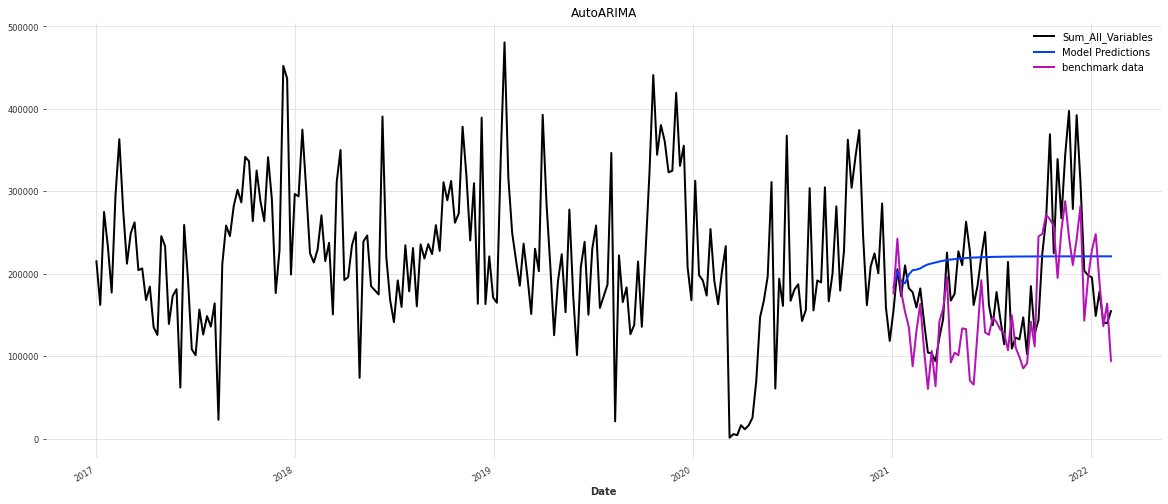

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Running for : Prophet
Fitting the Model with Deafults Params : Prophet
Benchmark Loss is : 51986.81034482759
Model Predict Loss is : 48835.94146380809


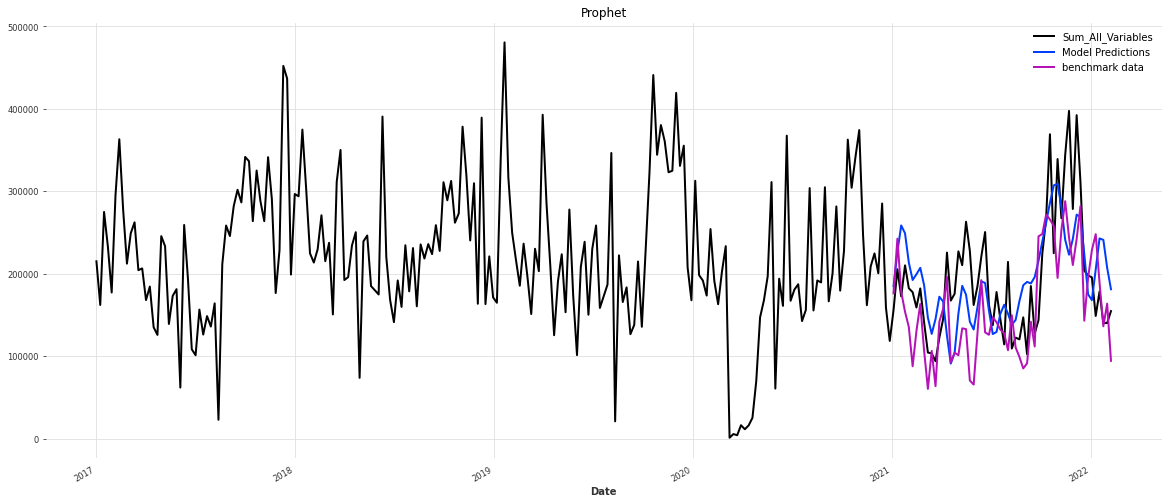

Running for : ExponentialSmoothing
Fitting the Model with Deafults Params : ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None
Benchmark Loss is : 51986.81034482759
Model Predict Loss is : 57125.80821513231


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


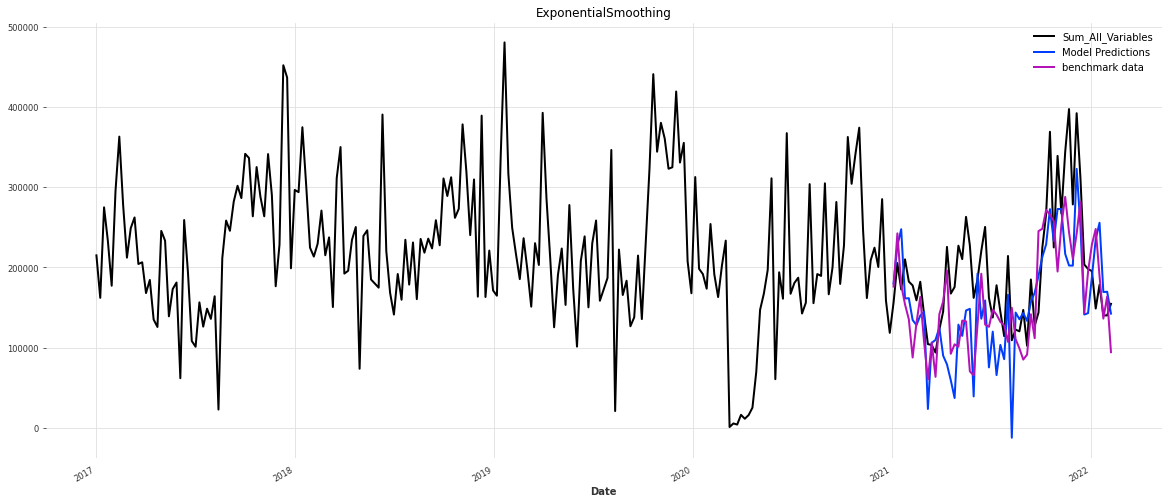

Running for : FFT
Fitting the Model with Deafults Params : FFT(nr_freqs_to_keep=10, trend=None)
Benchmark Loss is : 51986.81034482759
Model Predict Loss is : 68666.9234179342


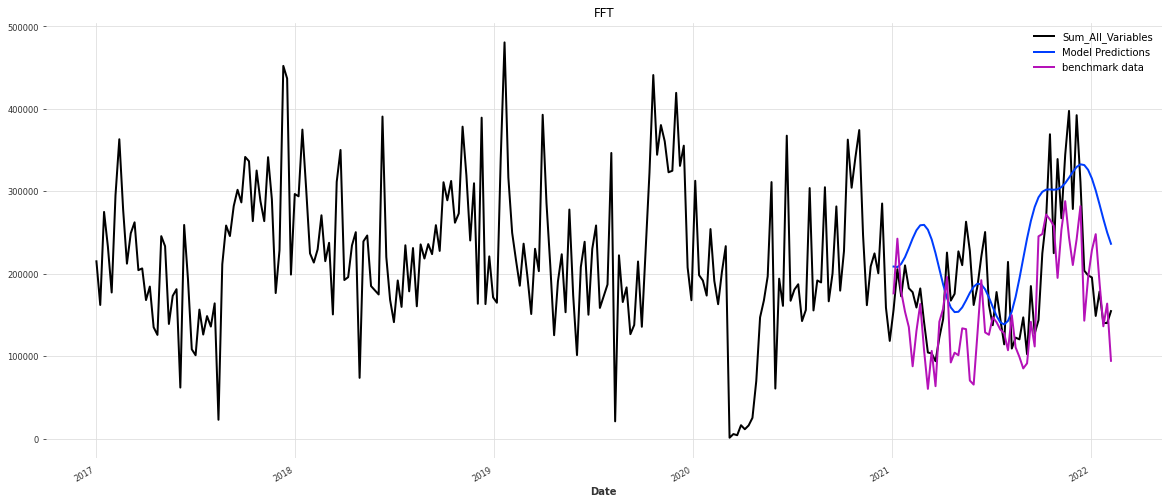

[2022-04-24 13:02:46,798] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
[2022-04-24 13:02:46,798] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 185 samples.
[2022-04-24 13:02:46,805] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-24 13:02:46,805] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type    | Params
--------------------------------------
0 | criterion | MSELoss | 0     
1 | rnn       | RNN     | 700   
2 | V         | Linear  

Running for : RNNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.rnn_model.RNNModel object at 0x000001CA0199B708>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 51986.81034482759
Model Predict Loss is : 193999.52892930535


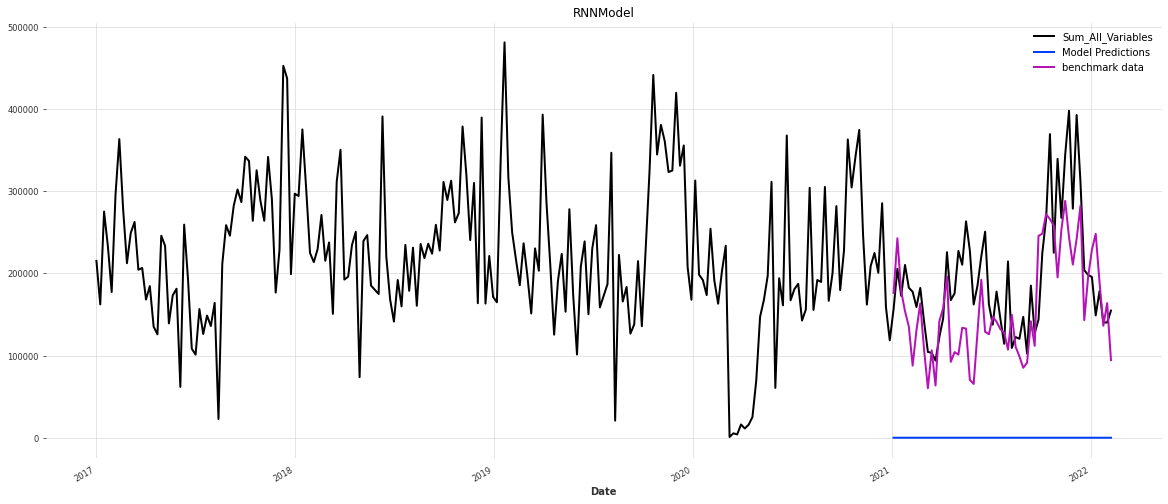

[2022-04-24 13:03:00,669] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-04-24 13:03:00,669] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-04-24 13:03:00,674] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
[2022-04-24 13:03:00,674] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
INFO:darts.models.forecasting.tcn_model:Number of layers chosen: 4
[2022-04-24 13:03:00,678] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-24 13:03:00,678] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available

Running for : TCNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.tcn_model.TCNModel object at 0x000001CA6C6B9EC8>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 51986.81034482759
Model Predict Loss is : 73403.42737127127


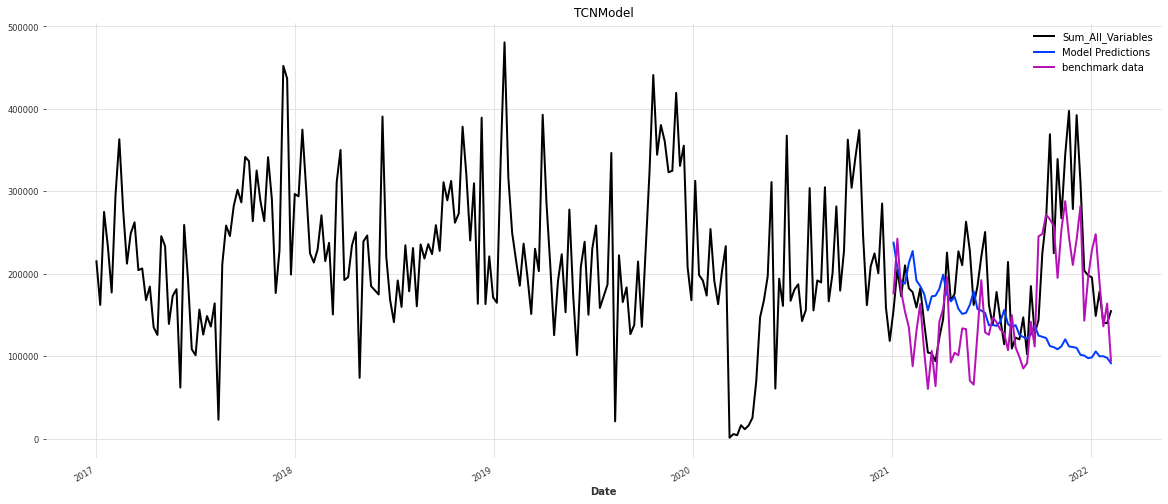

[2022-04-24 13:03:18,395] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-04-24 13:03:18,395] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.


Running for : NBEATSModel
Fitting the Model with Deafults Params : <darts.models.forecasting.nbeats.NBEATSModel object at 0x000001CA6D49BD48>


[2022-04-24 13:03:18,672] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-24 13:03:18,672] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type       | Params
-----------------------------------------
0 | criterion | MSELoss    | 0     
1 | stacks    | ModuleList | 6.3 M 
-----------------------------------------
6.3 M     Trainable params
1.5 K     Non-trainable params
6.3 M     Total params
50.072    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 51986.81034482759
Model Predict Loss is : 72589.8249798536


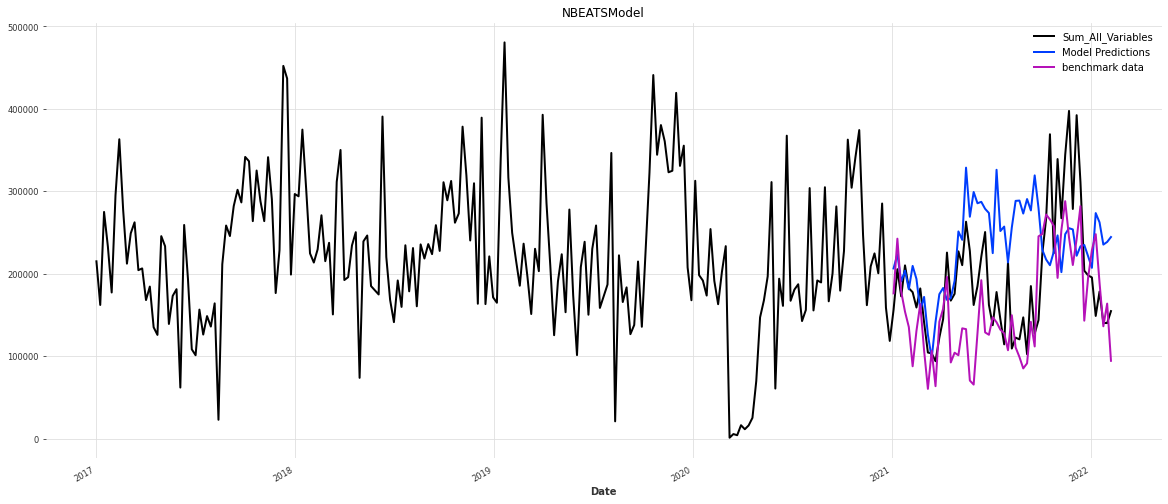

[2022-04-24 13:05:46,060] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-04-24 13:05:46,060] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-04-24 13:05:46,078] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-24 13:05:46,078] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             

Running for : TransformerModel
Fitting the Model with Deafults Params : <darts.models.forecasting.transformer_model.TransformerModel object at 0x000001CA0196B688>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 51986.81034482759
Model Predict Loss is : 193821.5422013797


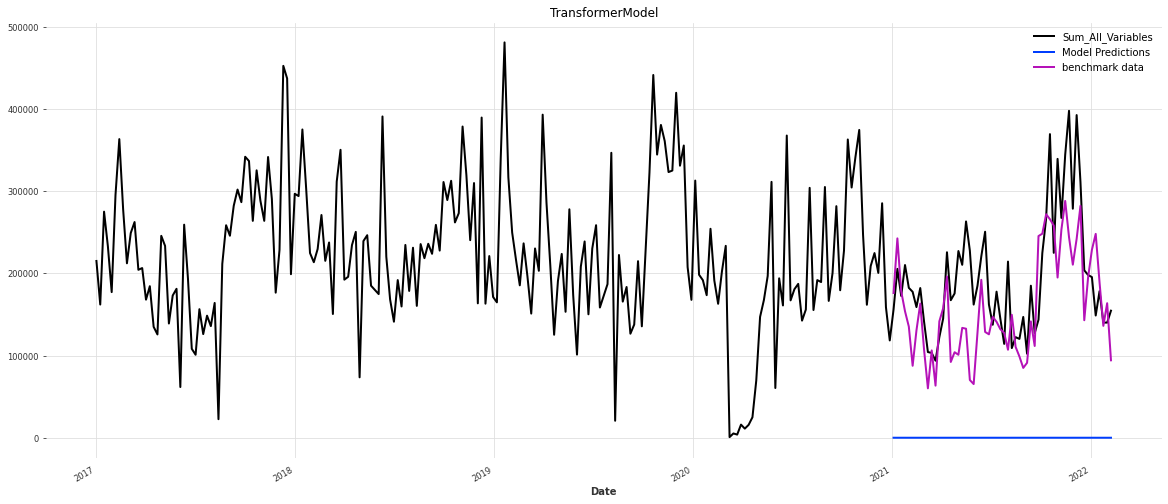

In [8]:
# Initialize the product details
import matplotlib.pyplot as plt
# Define the train function with Wandb Logging properly
def train(series_name):
    
    ## Create the directory  for our files
          try:
            os.makedirs("C:\\Users\\ashwini.kumar\\Time_Series_Modelling\\Outputs\\" + series_name)
          except OSError:
            pass
    
        # Define an empty Dataframe
          df = pd.DataFrame()
 # your model training code here
#           for num, model_type in enumerate([AutoARIMA(), Prophet()]):

# #           for num,model_type in enumerate([ Prophet()]):
#           for num,model_type in enumerate([RegressionModel(lags=24)
#                            ]):
          

          for num,model_type in enumerate([AutoARIMA(), Prophet(), ExponentialSmoothing(),  FFT(),
                              RNNModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0),
                              TCNModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0),
                              NBEATSModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0),
                              TransformerModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0)
                           ]):
        
#             list_model_names = ["Regression_Model"]

            list_model_names = ["AutoARIMA", "Prophet", "ExponentialSmoothing",  "FFT",
                              "RNNModel",
                              "TCNModel",
                              "NBEATSModel",
                              "TransformerModel"]
            
            print ("Running for :",list_model_names[num])
#             print (str(model_type))
            model = model_type
            print ("Fitting the Model with Deafults Params :",model_type)
            # Fit the model on training data 
            model_req = model.fit(train_data)
            #Make the prediction for 58 observation on train Data
            pred_air = model_req.predict(n = 58)
            
#             print (pred_air)
            # Predict the data for Backtesting
#             if num <= 4:
#                 pred_backtest = model.historical_forecasts(timeseries_input,
#                   start=pd.Timestamp("2020-12-28"),  forecast_horizon=4)
#             else:
#                 pred_backtest = model.historical_forecasts(timeseries_input,
#                   start=pd.Timestamp("2020-12-28"),  forecast_horizon=8, retrain=False)
#             print (pred_backtest)
#             print (len(pred_backtest))
            # Calculate the loss off model
            loss_model = mae(val_data , pred_air)
            #Calculate the loss of bencmark model
            loss_benchmark = mae(val_data, benchmark_data)
            # Calculate the loss off backtesting
#             loss_backtesting = mae(val_data,pred_backtest)
            # Print the loss function for benchmark data
            print ("Benchmark Loss is :", loss_benchmark) 
            # Print the loss function for benchmark data
            print ("Model Predict Loss is :", loss_model)      
            # Print the loss function for benchmark data
#             print ("Model Backtest Loss is :", loss_backtesting)  
            ## Add values to Dataframe
            df.loc[num, 'model'] = model_type
            df.loc[num,'loss_benchmark'] = loss_benchmark
#             df.loc[num,'loss_backtesting'] = loss_backtesting
            df.loc[num,'loss_model'] = loss_model
            # Initialize the plotting variables
            
            df.to_csv("C:\\Users\\ashwini.kumar\\Time_Series_Modelling\\Outputs\\" + series_name+"/valid_data.csv")
            plt.figure() 
            # Set the image size
            plt.rcParams["figure.figsize"] = (20,8)
            # Plot the actual time series data
            timeseries_input.plot()
            # Plot the prediction made
            pred_air.plot(label='Model Predictions', low_quantile=0.05, high_quantile=0.95)
            benchmark_data.plot(label='benchmark data', low_quantile=0.05, high_quantile=0.95)
#             pred_backtest.plot(label='Backtesting Predictions', low_quantile=0.05, high_quantile=0.95)
            plt.legend()
            plt.title(list_model_names[num])
            
            plt.savefig("C:\\Users\\ashwini.kumar\\Time_Series_Modelling\\Outputs\\" + series_name + "/" + str(list_model_names[num]) + '.png')
            plt.show()

         


# The function to define the train_data input data and other functions
def call_timeseries(train_column,benchmark_column):
    timeseries_input = df_to_timeseries(df,"Date",train_column)

    benchmark_input = df_to_timeseries(df,"Date",benchmark_column)
    # Set aside the data since 2021 
    train_data, val_data = timeseries_input.split_before(pd.Timestamp('2021-01-04'))

    train_benchmark_ignore, benchmark_data = benchmark_input.split_before(pd.Timestamp('2021-01-04'))
    
    return train_data,val_data,benchmark_data,timeseries_input


# train_series = ["req_ThunB2B_Sorter", "req_ThunB2C","req_ThunB2B_AA", "req_ThunB2B_PP",'Sum_All_Variables' ]
# benchmark_series = ["BOL_B2B Sorter Thun", "BOL_B2C Thun","BOL_B2B AA Thun", "BOL_B2B P&P Thun",'Sum_All_Variables_Benchmark']
train_series = ['Sum_All_Variables'  ]
benchmark_series = ['Sum_All_Variables_Benchmark' ]

# train_series = ['Sum_All_Variables' ]
# benchmark_series = ['Sum_All_Variables_Benchmark']


for i in range(len(train_series)):
    
    print ("Running for " , train_series[i])
    train_data,val_data,benchmark_data,timeseries_input = call_timeseries(train_series[i],benchmark_series[i])
    print ("Call the training function")
    train(train_series[i])

## Date: 21/04/2022
## Test all other three variables 

Running for  req_ThunB2B_Sort_BVB


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Call the training function
Running for : AutoArima
Fitting the Model with Deafults Params : Auto-ARIMA
MAPE Loss is : 42.17263046434015
MAE loss  is : 8220.1915632643


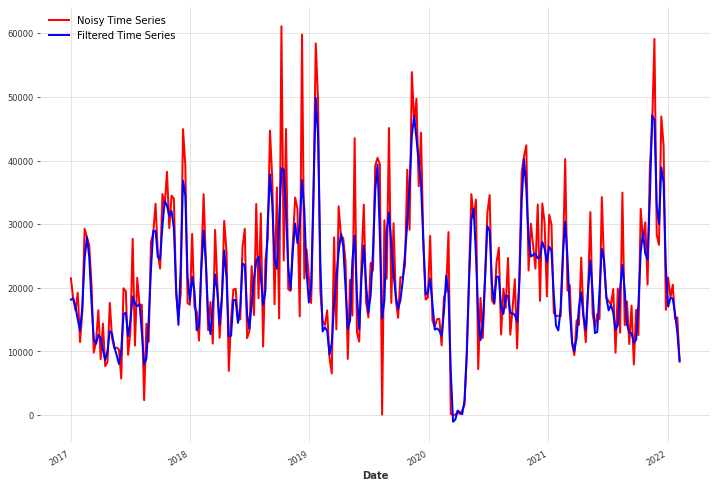

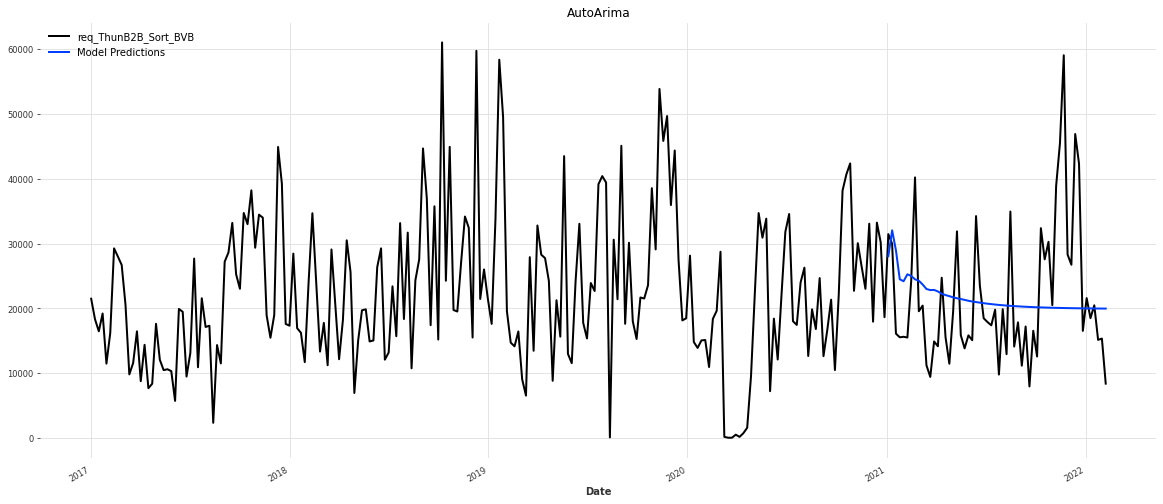

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Running for : prophet
Fitting the Model with Deafults Params : Prophet
MAPE Loss is : 31.422977894689406
MAE loss  is : 6704.927334776825


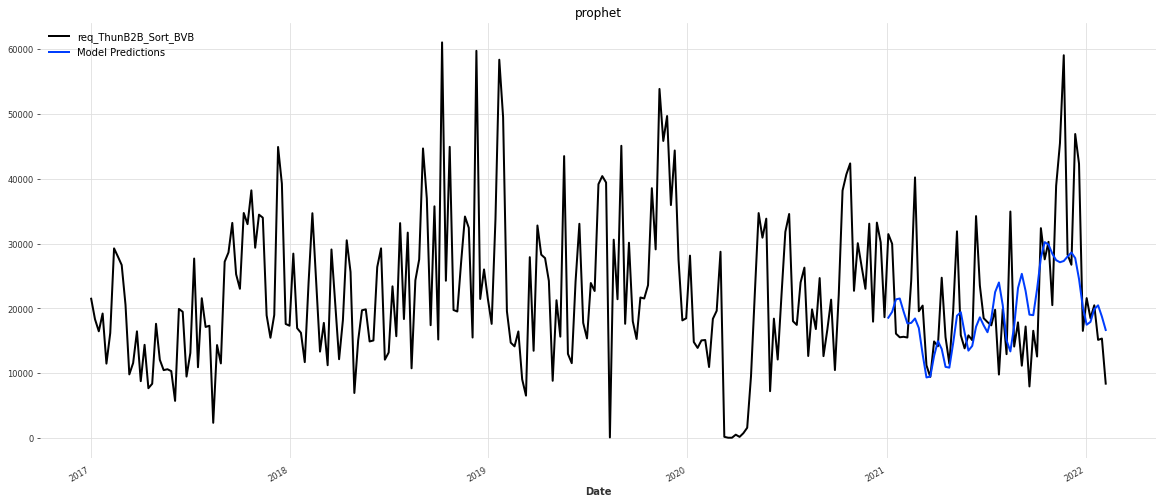

Running for : ExponentialSmoothing
Fitting the Model with Deafults Params : ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


MAPE Loss is : 60.92072906092305
MAE loss  is : 9985.14192553844


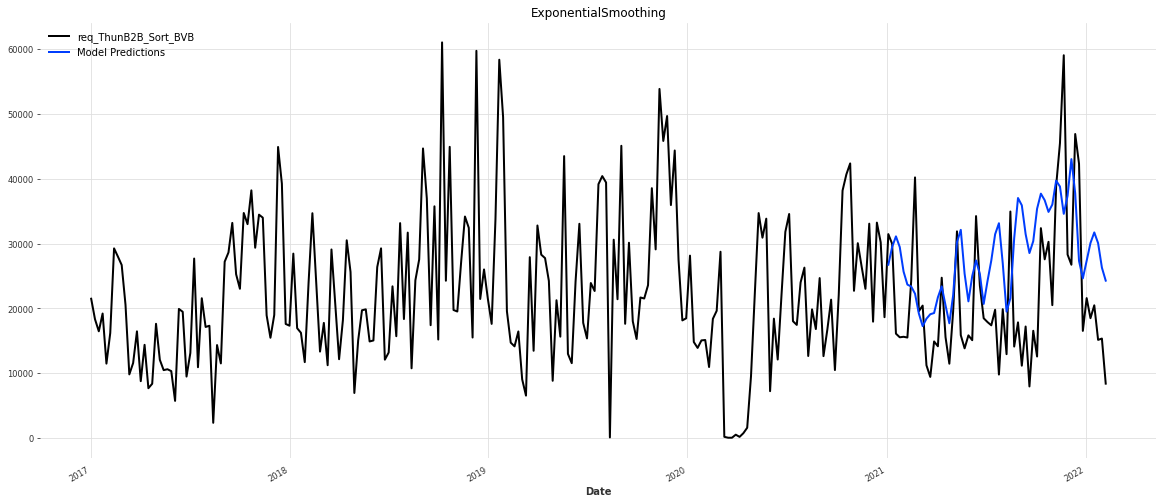

Running for : FFT
Fitting the Model with Deafults Params : FFT(nr_freqs_to_keep=10, trend=None)
MAPE Loss is : 36.83034077796997
MAE loss  is : 7558.497470118802


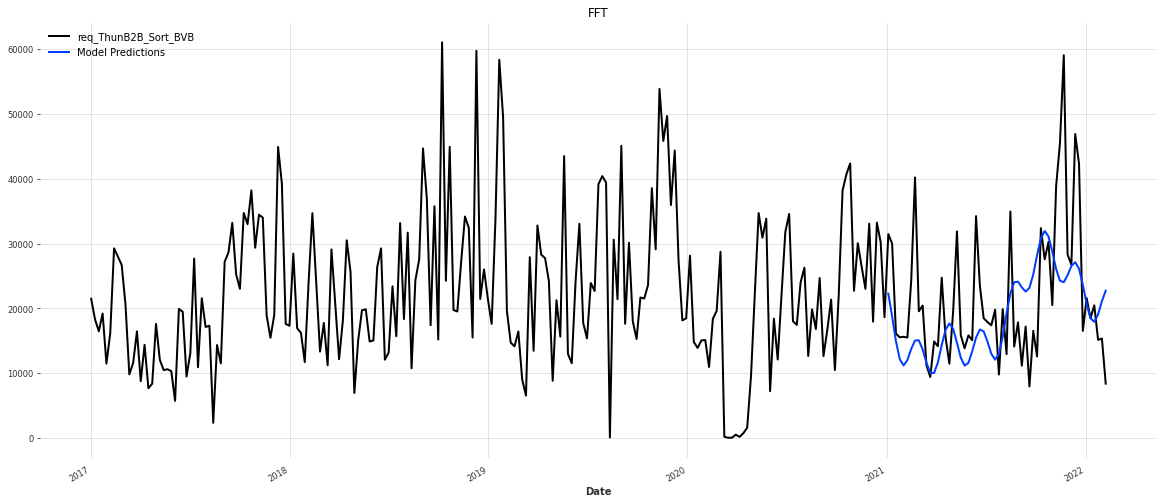

[2022-04-22 12:28:02,803] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
[2022-04-22 12:28:02,803] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 185 samples.
[2022-04-22 12:28:02,810] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-22 12:28:02,810] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type    | Params
--------------------------------------
0 | criterion | MSELoss | 0     
1 | rnn       | RNN     | 700   
2 | V         | Linear  

Running for : RNNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.rnn_model.RNNModel object at 0x000001A83D9FDDC8>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

MAPE Loss is : 99.89350497554491
MAE loss  is : 21763.9979514096


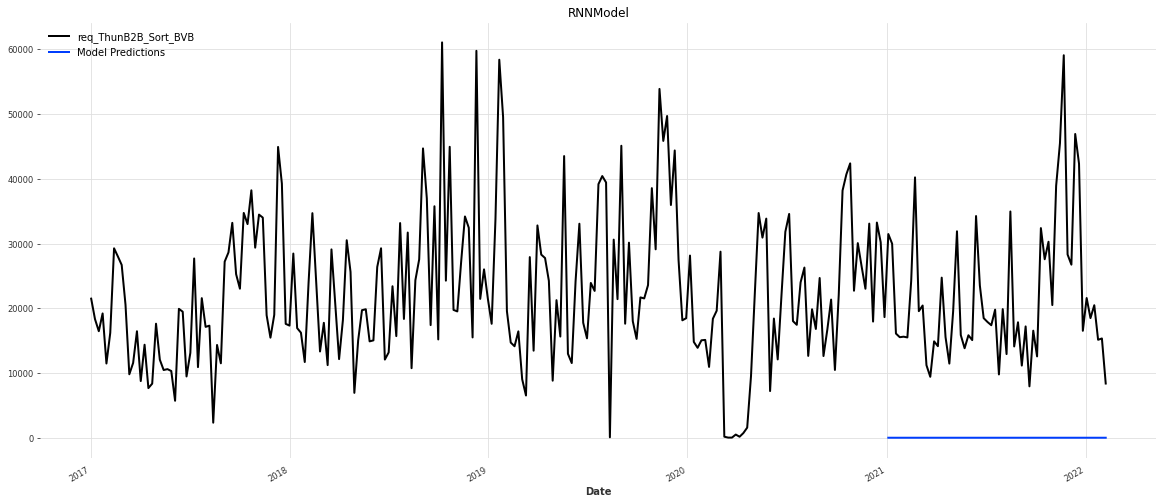

[2022-04-22 12:28:23,574] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-04-22 12:28:23,574] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-04-22 12:28:23,580] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
[2022-04-22 12:28:23,580] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
INFO:darts.models.forecasting.tcn_model:Number of layers chosen: 4
[2022-04-22 12:28:23,585] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-22 12:28:23,585] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available

Running for : TCNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.tcn_model.TCNModel object at 0x000001A83C5BF948>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

MAPE Loss is : 37.27695075907431
MAE loss  is : 9170.765612590276


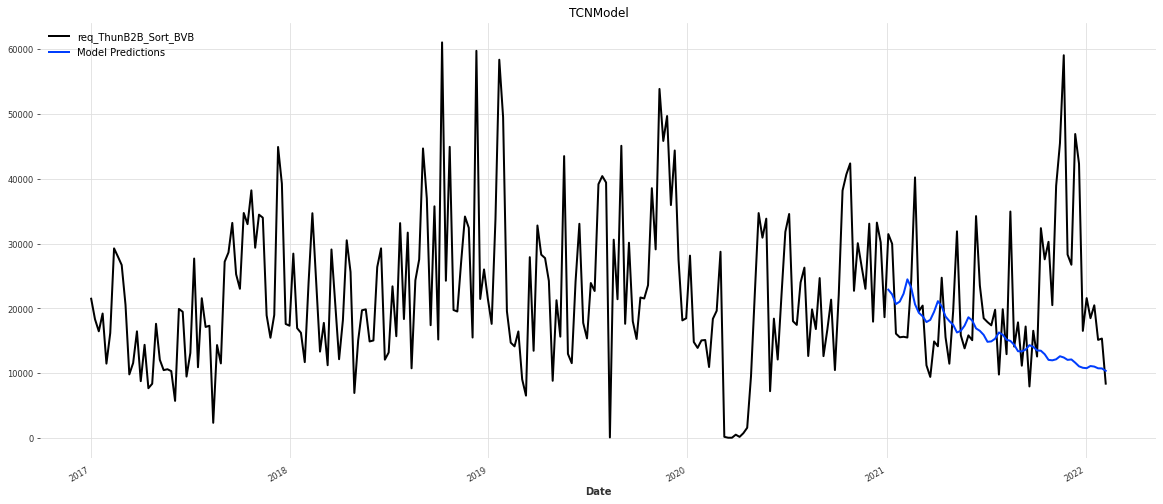

[2022-04-22 12:28:45,805] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-04-22 12:28:45,805] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-04-22 12:28:45,941] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-22 12:28:45,941] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Running for : NBEATSModel
Fitting the Model with Deafults Params : <darts.models.forecasting.nbeats.NBEATSModel object at 0x000001A83C5BF9C8>



  | Name      | Type       | Params
-----------------------------------------
0 | criterion | MSELoss    | 0     
1 | stacks    | ModuleList | 6.3 M 
-----------------------------------------
6.3 M     Trainable params
1.5 K     Non-trainable params
6.3 M     Total params
50.072    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

MAPE Loss is : 48.58843795361418
MAE loss  is : 9856.251248715267


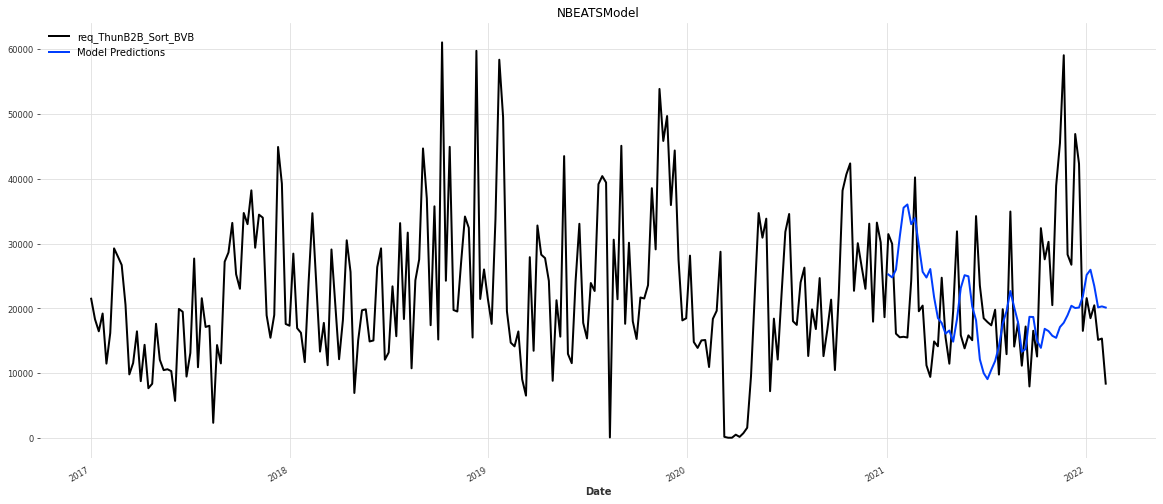

[2022-04-22 12:32:27,898] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-04-22 12:32:27,898] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-04-22 12:32:27,937] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-22 12:32:27,937] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             

Running for : TransformerModel
Fitting the Model with Deafults Params : <darts.models.forecasting.transformer_model.TransformerModel object at 0x000001A84D376848>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

MAPE Loss is : 98.9220339149729
MAE loss  is : 21589.743589692316


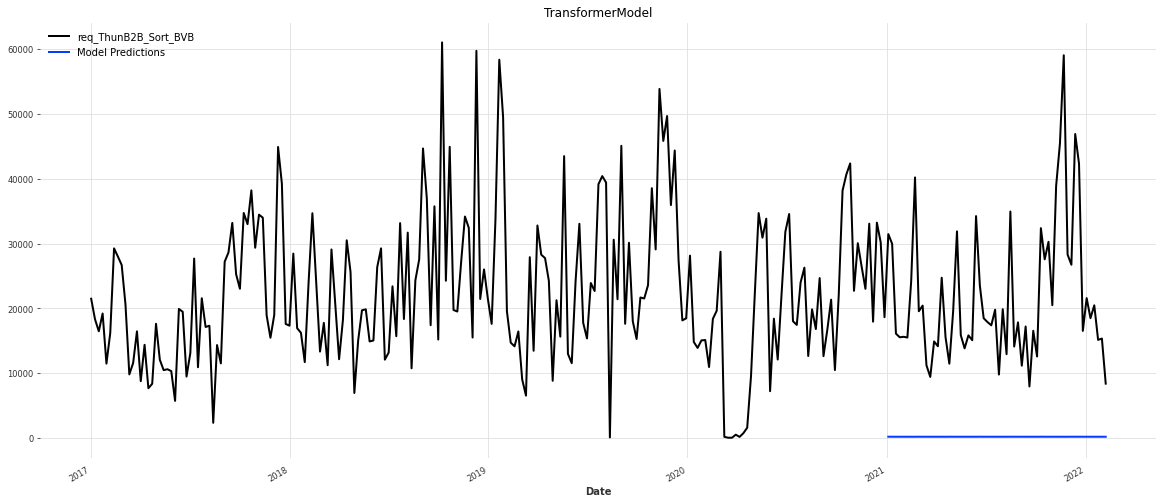

Running for  req_ThunB2B_Sort_SM


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Call the training function
Running for : AutoArima
Fitting the Model with Deafults Params : Auto-ARIMA
MAPE Loss is : 53.28582689745593
MAE loss  is : 41844.90573156634


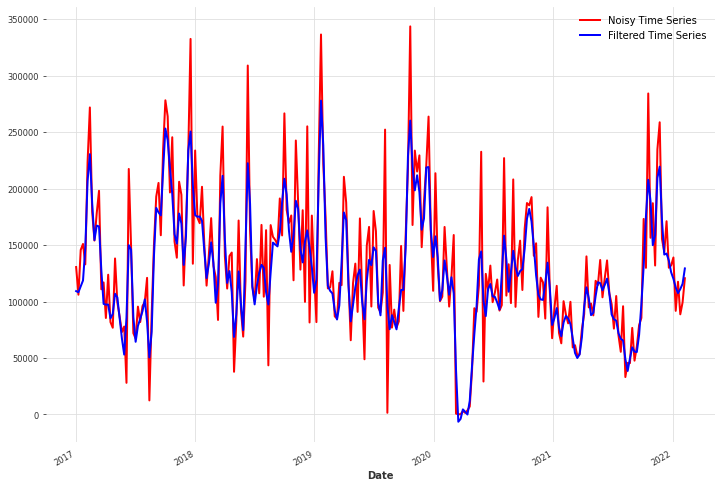

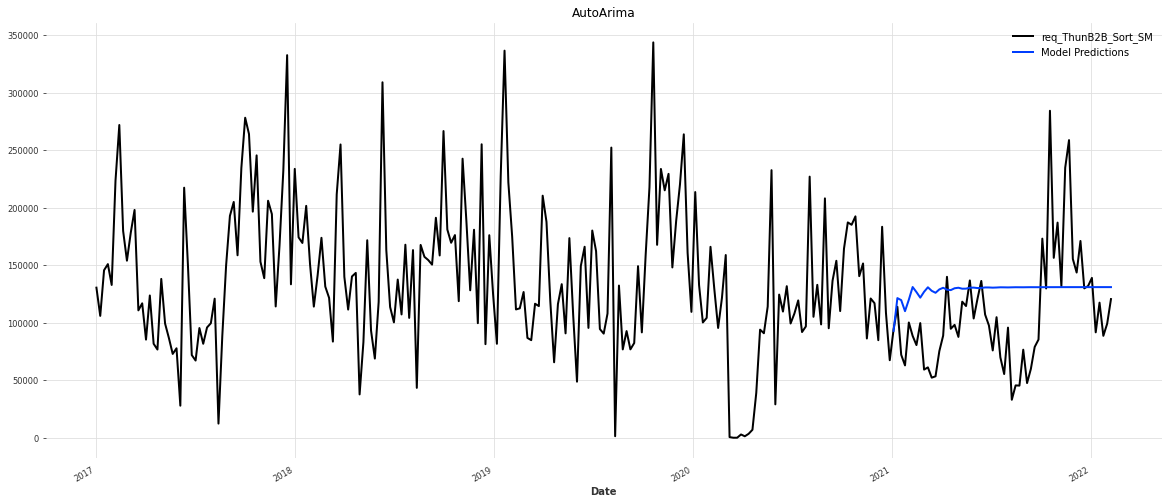

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Running for : prophet
Fitting the Model with Deafults Params : Prophet
MAPE Loss is : 34.10484392736469
MAE loss  is : 33424.89420984222


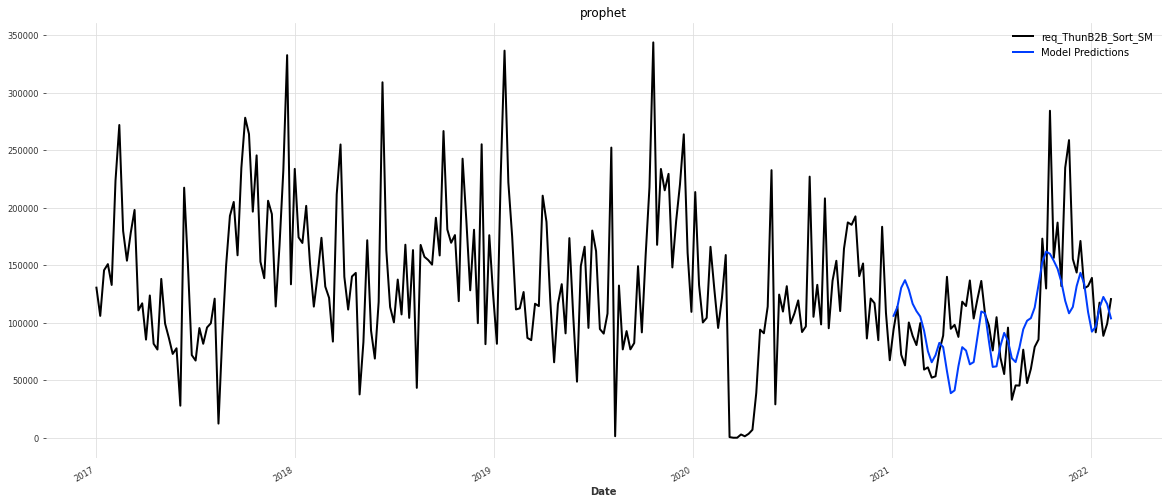

Running for : ExponentialSmoothing
Fitting the Model with Deafults Params : ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


MAPE Loss is : 42.80856149076574
MAE loss  is : 47241.442667246534


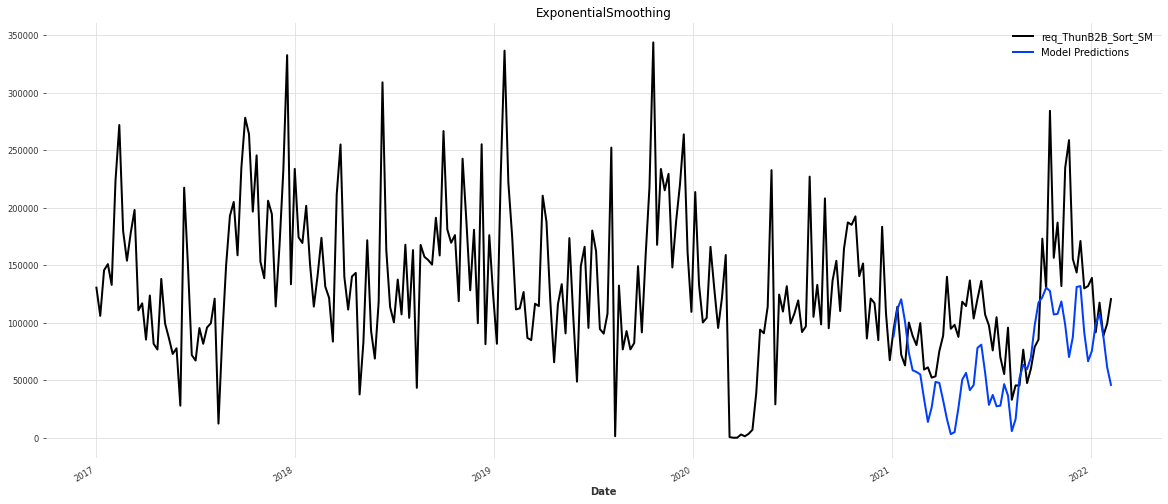

Running for : FFT
Fitting the Model with Deafults Params : FFT(nr_freqs_to_keep=10, trend=None)
MAPE Loss is : 57.70148619361686
MAE loss  is : 46821.519223689334


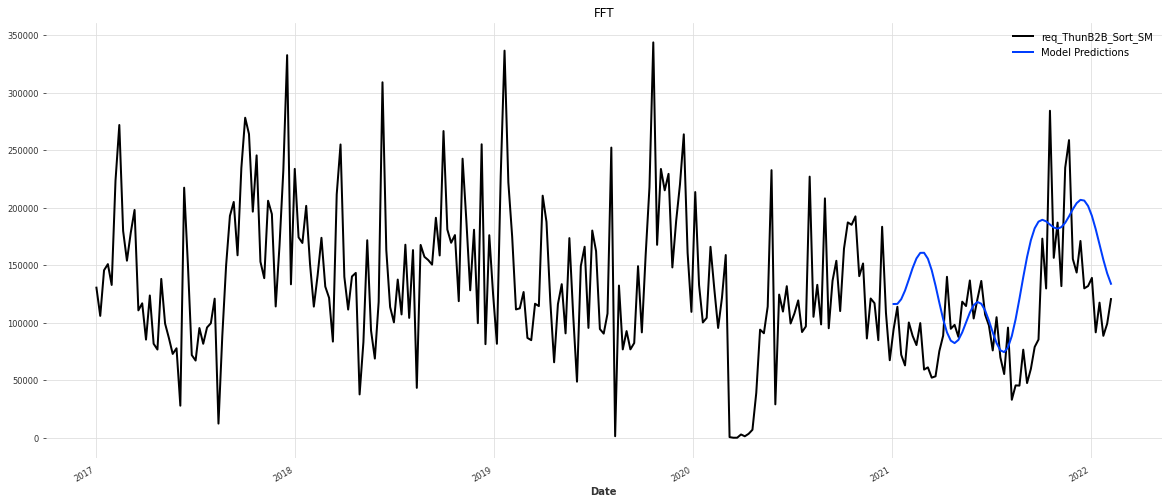

[2022-04-22 12:35:34,391] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
[2022-04-22 12:35:34,391] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 185 samples.
[2022-04-22 12:35:34,399] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-22 12:35:34,399] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type    | Params
--------------------------------------
0 | criterion | MSELoss | 0     
1 | rnn       | RNN     | 700   
2 | V         | Linear  

Running for : RNNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.rnn_model.RNNModel object at 0x000001A83B527408>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

MAPE Loss is : 99.98005900165353
MAE loss  is : 108332.78902838555


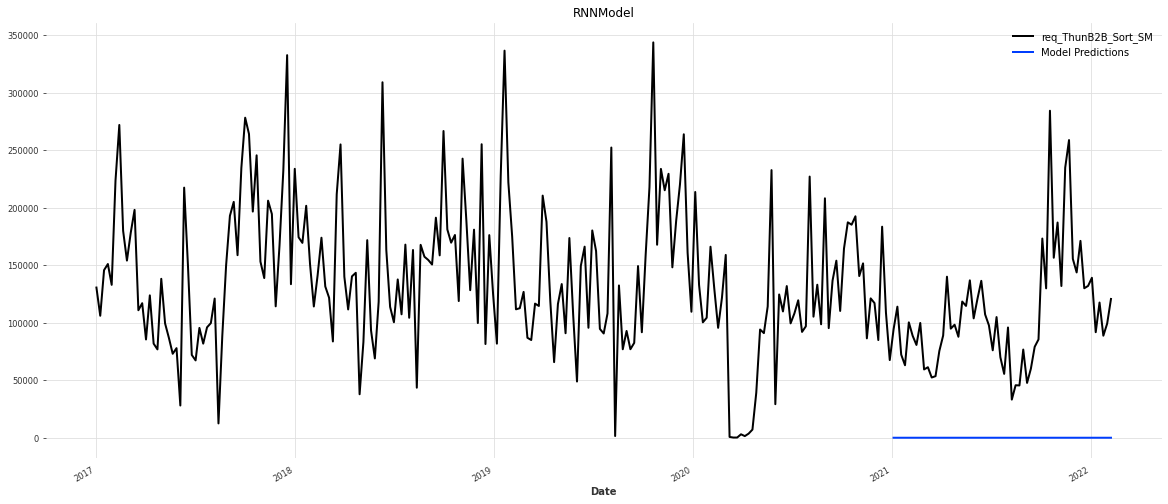

[2022-04-22 12:35:56,573] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-04-22 12:35:56,573] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-04-22 12:35:56,579] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
[2022-04-22 12:35:56,579] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
INFO:darts.models.forecasting.tcn_model:Number of layers chosen: 4
[2022-04-22 12:35:56,585] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-22 12:35:56,585] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available

Running for : TCNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.tcn_model.TCNModel object at 0x000001A83C532C48>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

MAPE Loss is : 39.4609707234752
MAE loss  is : 45605.79844668699


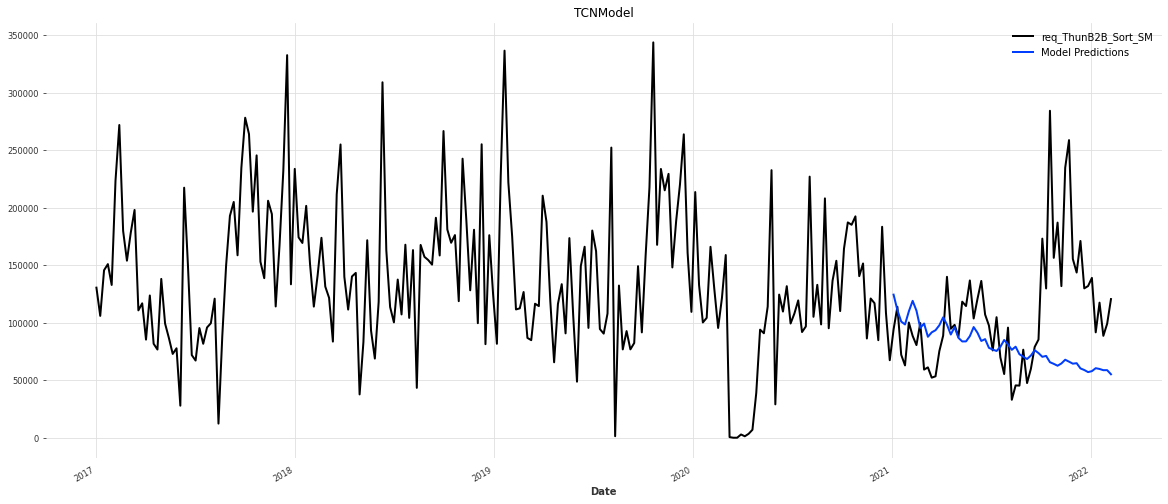

[2022-04-22 12:36:17,713] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-04-22 12:36:17,713] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-04-22 12:36:17,817] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-22 12:36:17,817] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type       | Params
-----------------------------------------
0 | criterion | MSELoss    | 0     
1 | stacks    | ModuleList | 6.3 M 
------------

Running for : NBEATSModel
Fitting the Model with Deafults Params : <darts.models.forecasting.nbeats.NBEATSModel object at 0x000001A83C5328C8>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

MAPE Loss is : 37.54591441584937
MAE loss  is : 38816.569176341334


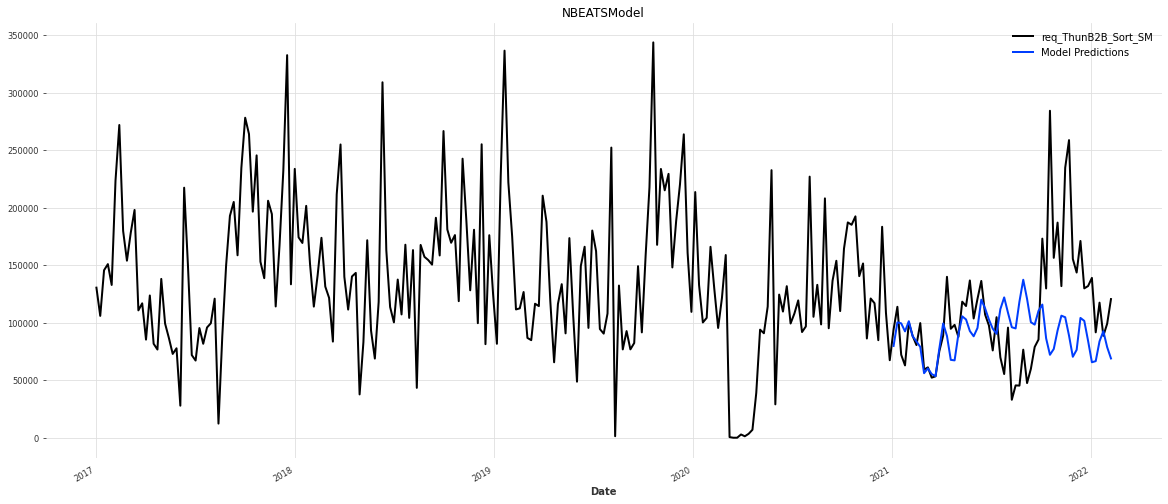

[2022-04-22 12:39:35,162] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-04-22 12:39:35,162] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-04-22 12:39:35,191] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-22 12:39:35,191] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             

Running for : TransformerModel
Fitting the Model with Deafults Params : <darts.models.forecasting.transformer_model.TransformerModel object at 0x000001A84D376848>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

MAPE Loss is : 99.78400831109326
MAE loss  is : 108156.80874419703


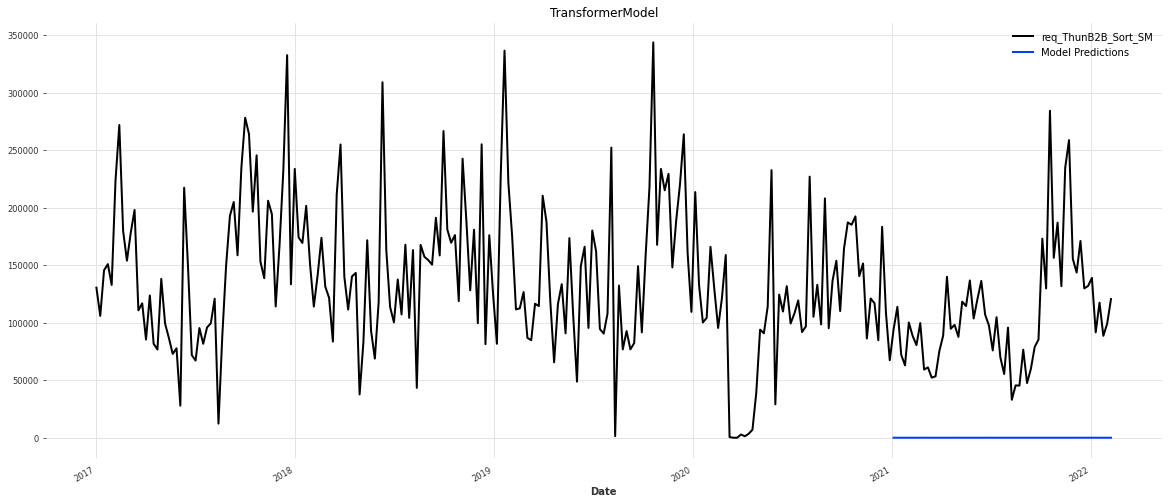

Running for  req_ThunB2B_SortSM_10more_no


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Call the training function
Running for : AutoArima
Fitting the Model with Deafults Params : Auto-ARIMA
MAPE Loss is : 30.845905405574904
MAE loss  is : 2448.087341987141


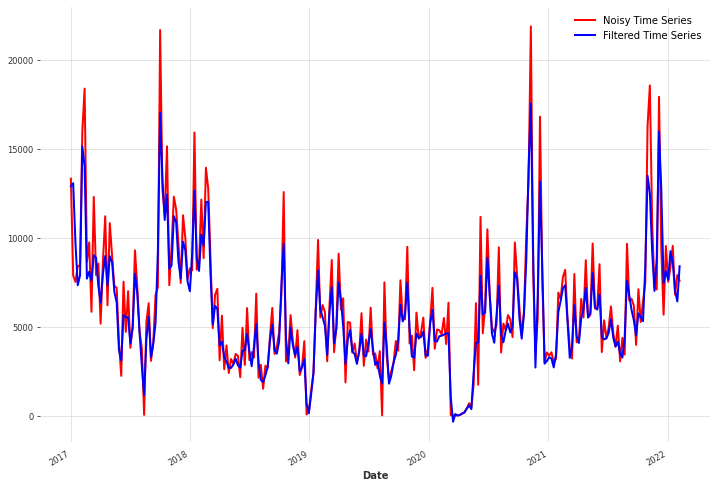

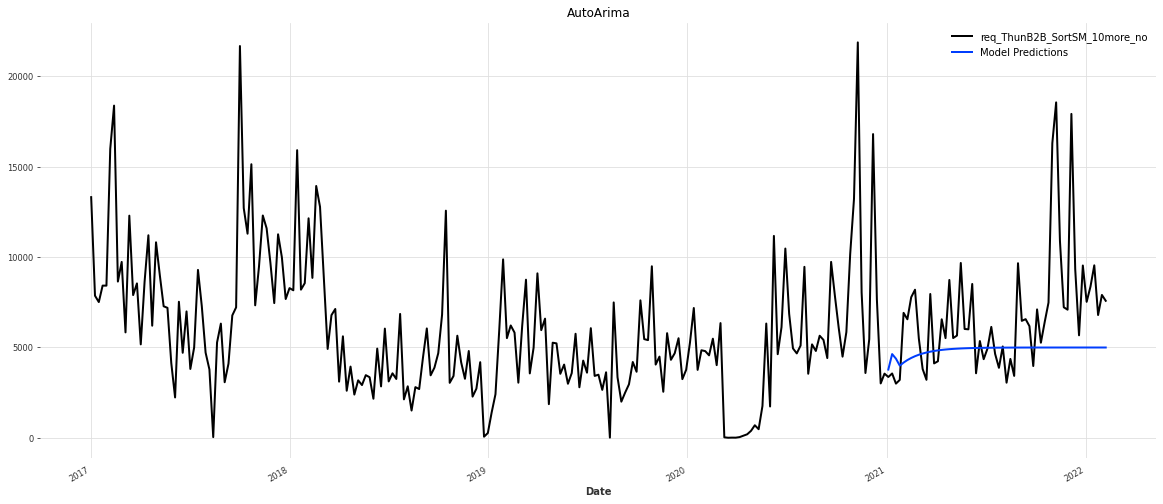

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Running for : prophet
Fitting the Model with Deafults Params : Prophet
MAPE Loss is : 31.145296534845908
MAE loss  is : 2128.3867337934794


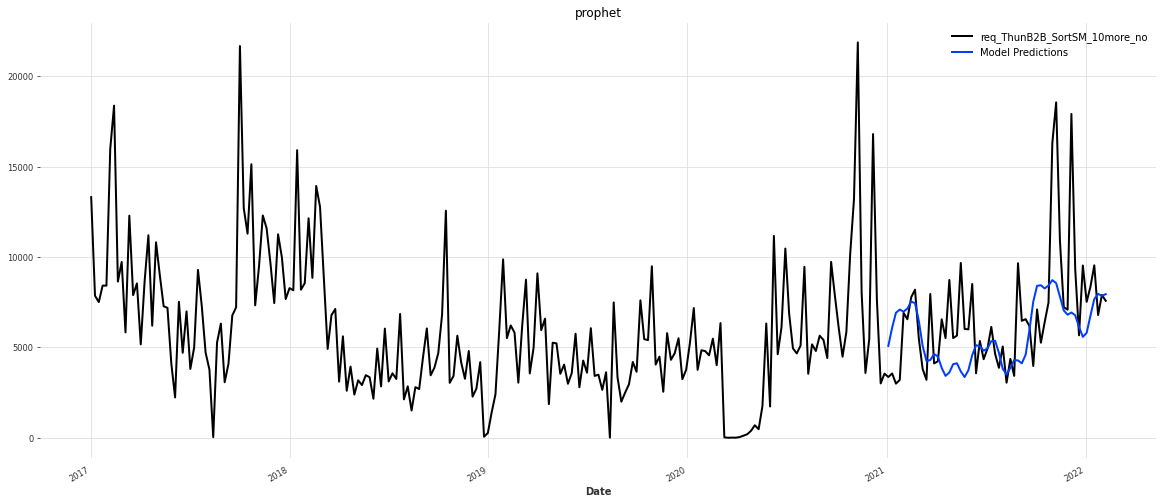

Running for : ExponentialSmoothing
Fitting the Model with Deafults Params : ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


MAPE Loss is : 44.82368597023498
MAE loss  is : 3175.951828482227


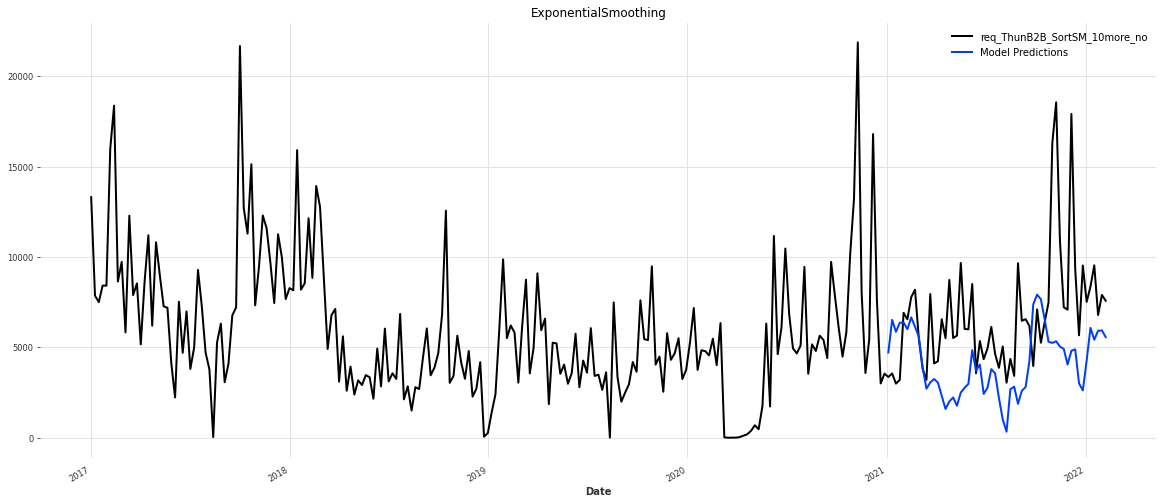

Running for : FFT
Fitting the Model with Deafults Params : FFT(nr_freqs_to_keep=10, trend=None)
MAPE Loss is : 42.7094043237518
MAE loss  is : 2411.2690165461863


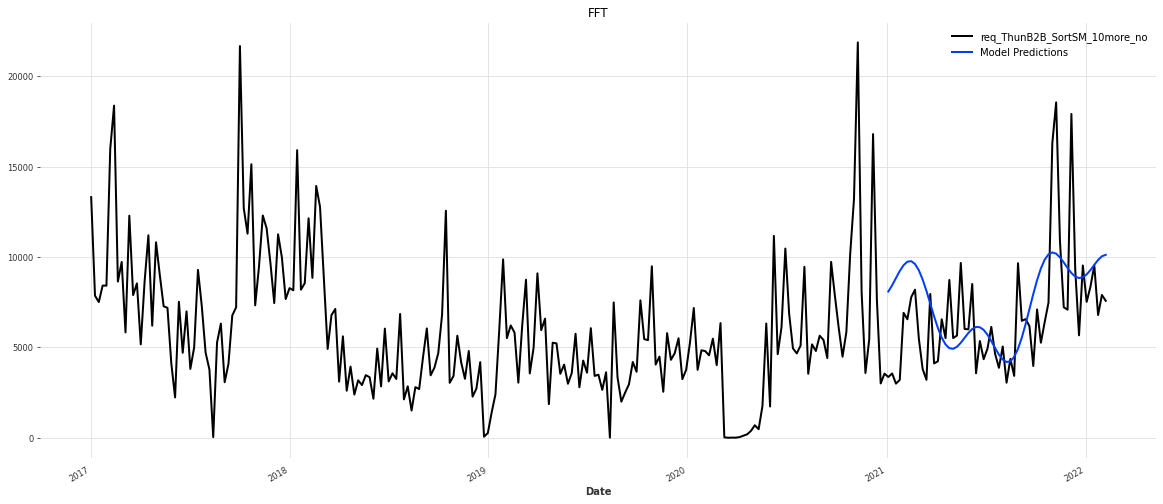

[2022-04-22 12:47:44,615] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
[2022-04-22 12:47:44,615] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 185 samples.
[2022-04-22 12:47:44,633] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-22 12:47:44,633] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type    | Params
--------------------------------------
0 | criterion | MSELoss | 0     
1 | rnn       | RNN     | 700   
2 | V         | Linear  

Running for : RNNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.rnn_model.RNNModel object at 0x000001A83AA31108>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

MAPE Loss is : 99.65100913444273
MAE loss  is : 6726.998485286664


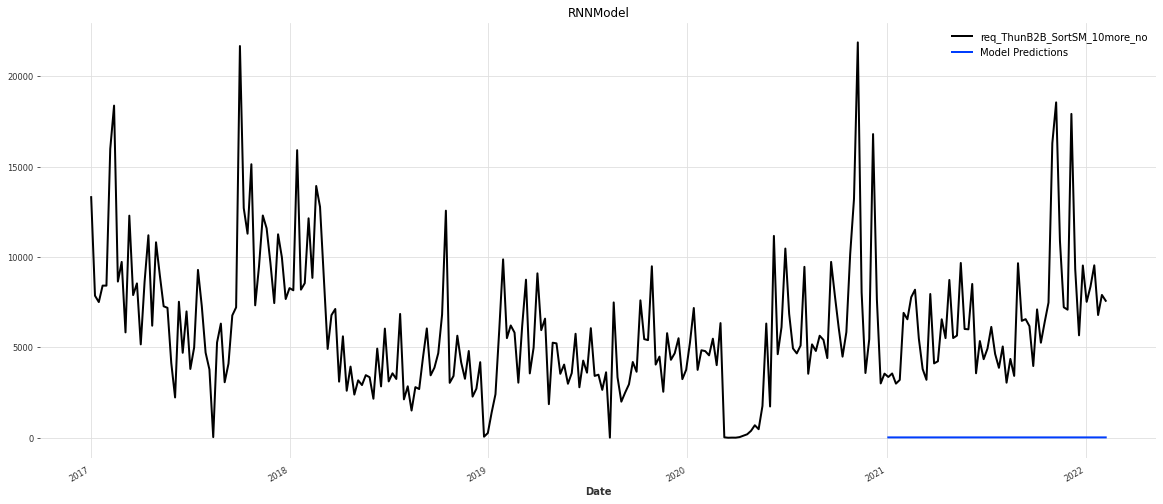

[2022-04-22 12:48:49,480] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-04-22 12:48:49,480] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-04-22 12:48:49,499] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
[2022-04-22 12:48:49,499] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
INFO:darts.models.forecasting.tcn_model:Number of layers chosen: 4
[2022-04-22 12:48:49,519] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-22 12:48:49,519] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available

Running for : TCNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.tcn_model.TCNModel object at 0x000001A83BDFCB88>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

MAPE Loss is : 45.967014734502385
MAE loss  is : 3125.806063313409


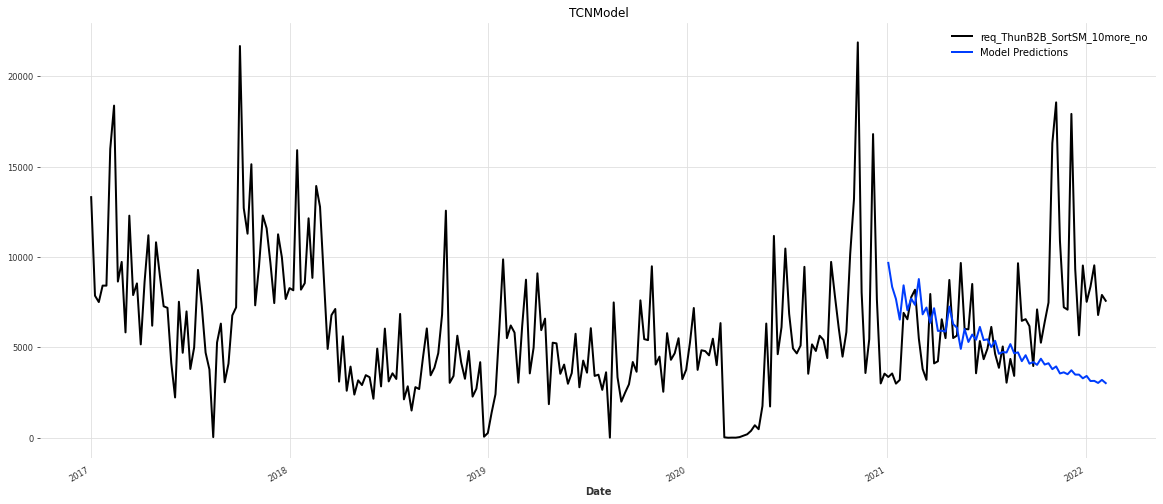

[2022-04-22 12:49:50,239] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-04-22 12:49:50,239] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.


Running for : NBEATSModel
Fitting the Model with Deafults Params : <darts.models.forecasting.nbeats.NBEATSModel object at 0x000001A83AA31F88>


[2022-04-22 12:49:50,456] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-22 12:49:50,456] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type       | Params
-----------------------------------------
0 | criterion | MSELoss    | 0     
1 | stacks    | ModuleList | 6.3 M 
-----------------------------------------
6.3 M     Trainable params
1.5 K     Non-trainable params
6.3 M     Total params
50.072    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

MAPE Loss is : 67.1566669039579
MAE loss  is : 4243.754603652379


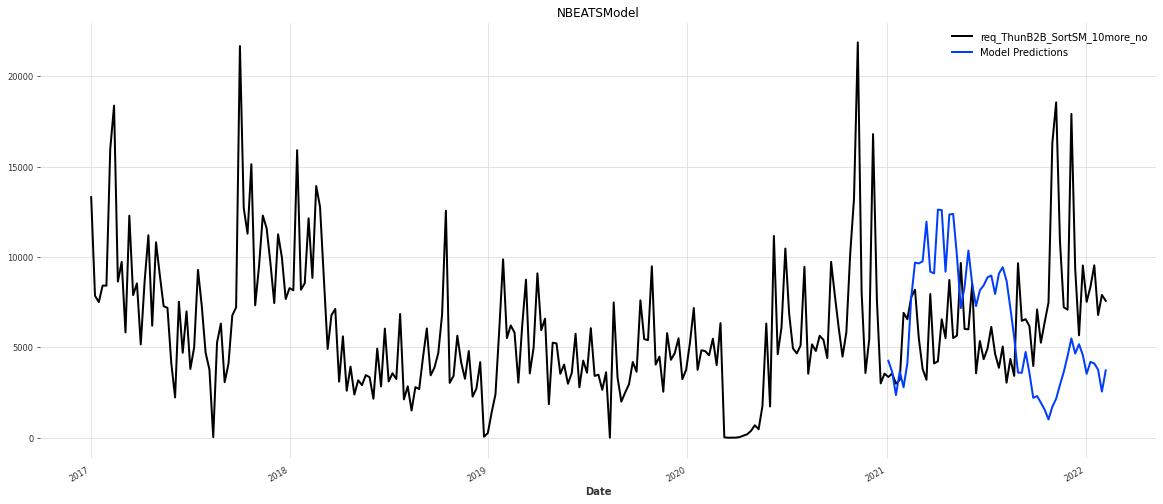

[2022-04-22 12:58:00,206] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-04-22 12:58:00,206] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-04-22 12:58:00,243] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-22 12:58:00,243] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             

Running for : TransformerModel
Fitting the Model with Deafults Params : <darts.models.forecasting.transformer_model.TransformerModel object at 0x000001A83AA31688>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

MAPE Loss is : 96.64356550180351
MAE loss  is : 6556.401359611208


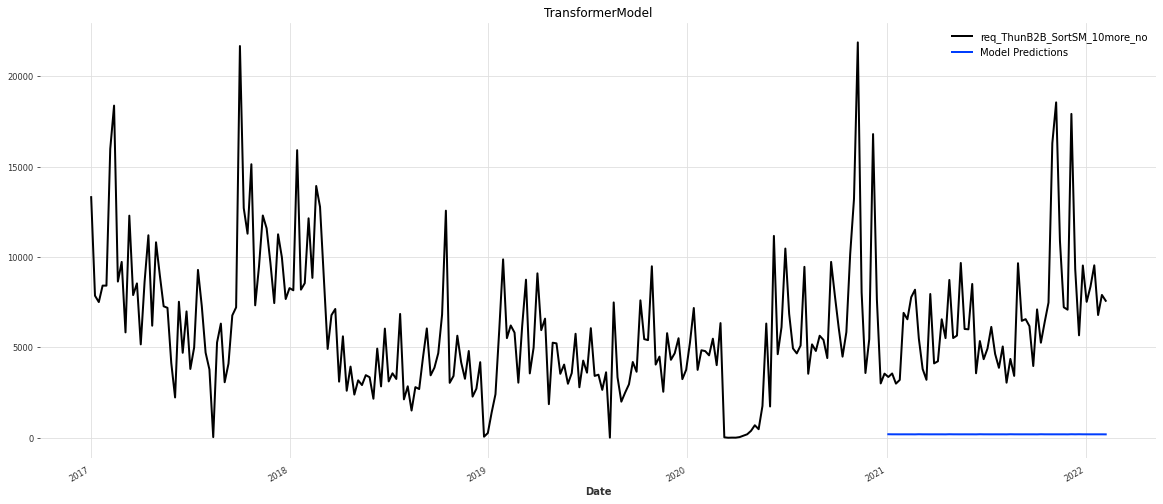

Running for  req_ThunB2B_SortSM_10more_yes


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Call the training function
Running for : AutoArima
Fitting the Model with Deafults Params : Auto-ARIMA
MAPE Loss is : 55.12974666896697
MAE loss  is : 39941.51906986181


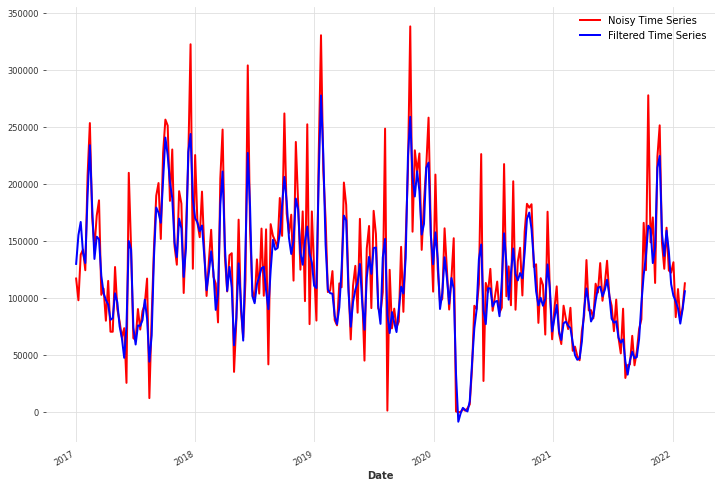

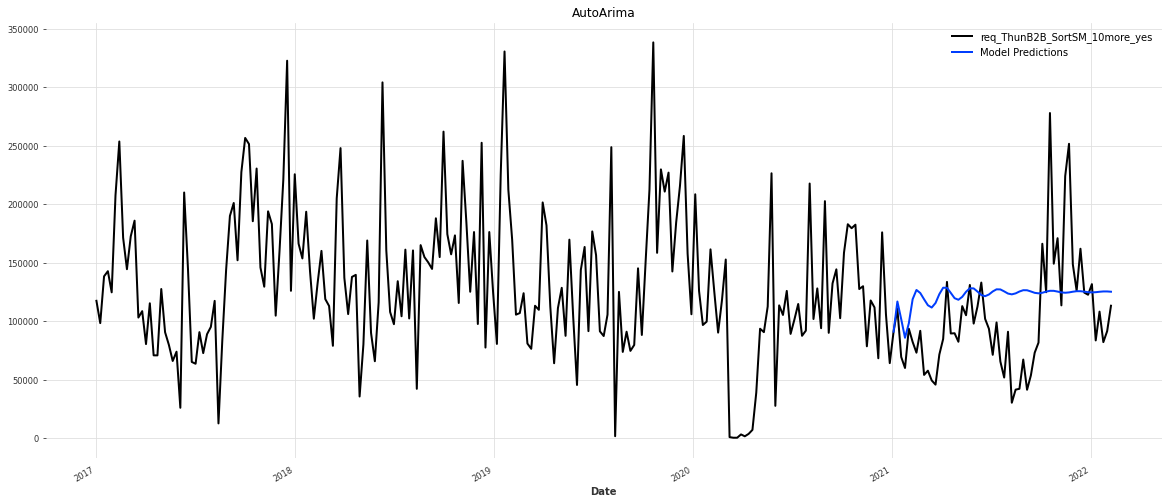

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Running for : prophet
Fitting the Model with Deafults Params : Prophet
MAPE Loss is : 37.81268381522121
MAE loss  is : 33307.34284977138


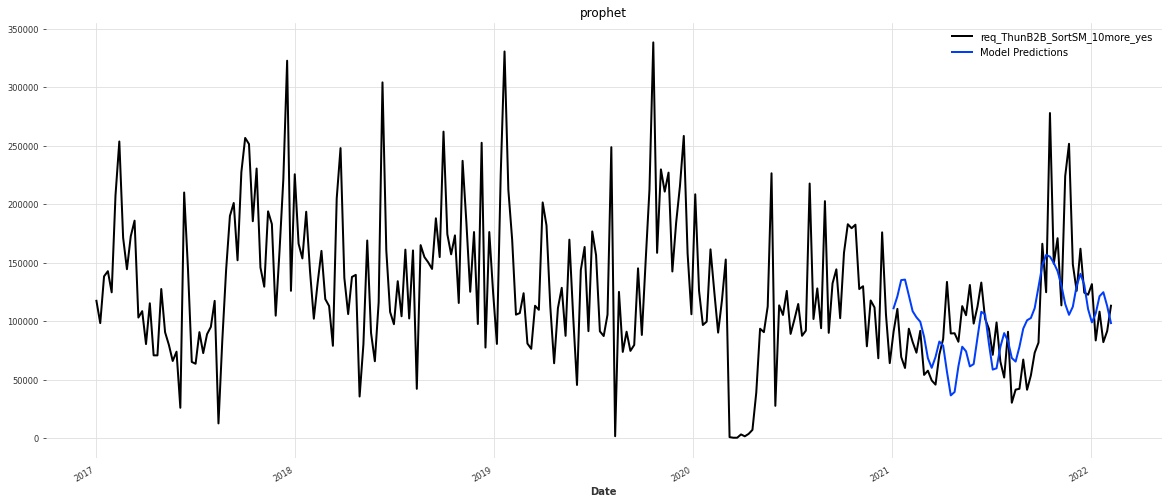

Running for : ExponentialSmoothing
Fitting the Model with Deafults Params : ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


MAPE Loss is : 55.245528853698545
MAE loss  is : 56643.62441148402


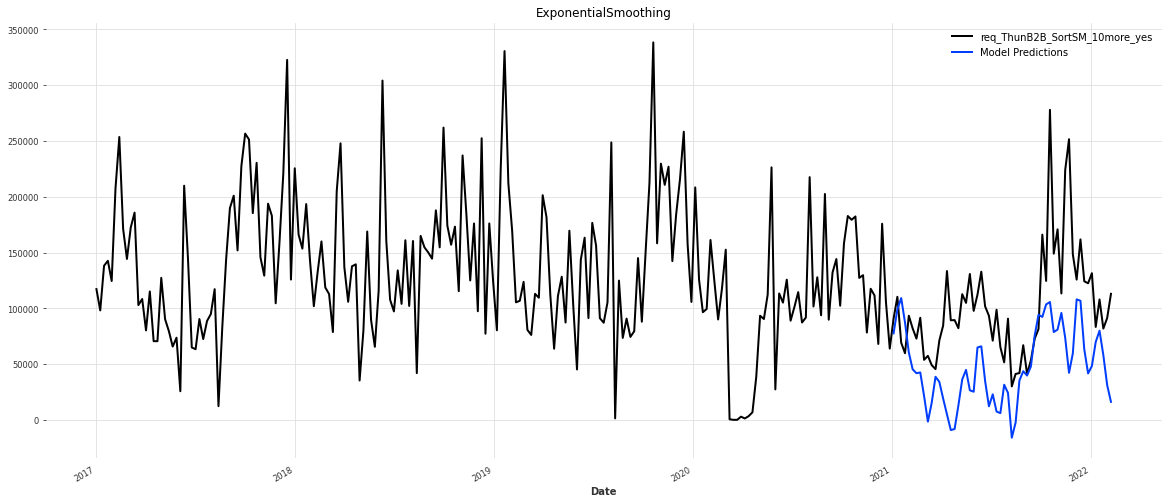

Running for : FFT
Fitting the Model with Deafults Params : FFT(nr_freqs_to_keep=10, trend=None)
MAPE Loss is : 67.31420122641725
MAE loss  is : 49170.886782229856


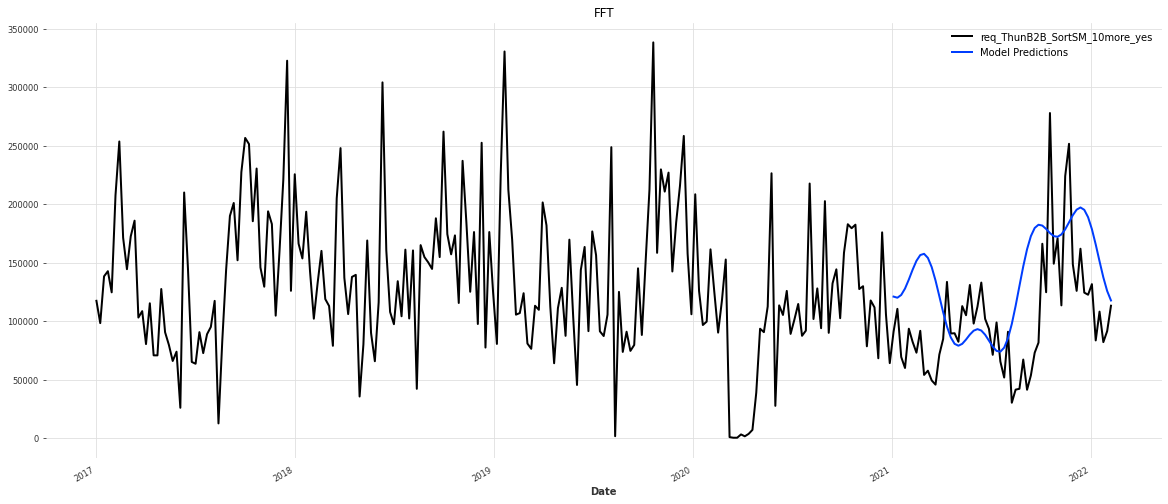

[2022-04-22 13:00:52,088] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
[2022-04-22 13:00:52,088] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 185 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 185 samples.
[2022-04-22 13:00:52,098] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-22 13:00:52,098] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type    | Params
--------------------------------------
0 | criterion | MSELoss | 0     
1 | rnn       | RNN     | 700   
2 | V         | Linear  

Running for : RNNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.rnn_model.RNNModel object at 0x000001A83D943FC8>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

MAPE Loss is : 99.98094174551856
MAE loss  is : 101588.05298682707


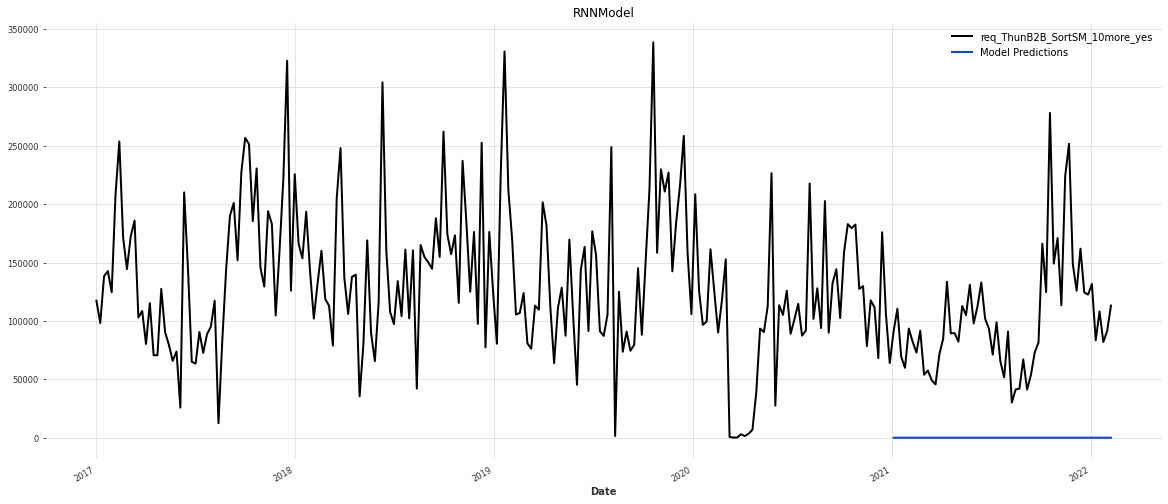

[2022-04-22 13:01:16,260] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-04-22 13:01:16,260] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-04-22 13:01:16,266] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
[2022-04-22 13:01:16,266] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
INFO:darts.models.forecasting.tcn_model:Number of layers chosen: 4
[2022-04-22 13:01:16,274] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-22 13:01:16,274] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available

Running for : TCNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.tcn_model.TCNModel object at 0x000001A83C4F0388>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

MAPE Loss is : 41.630866213602616
MAE loss  is : 47107.12678186171


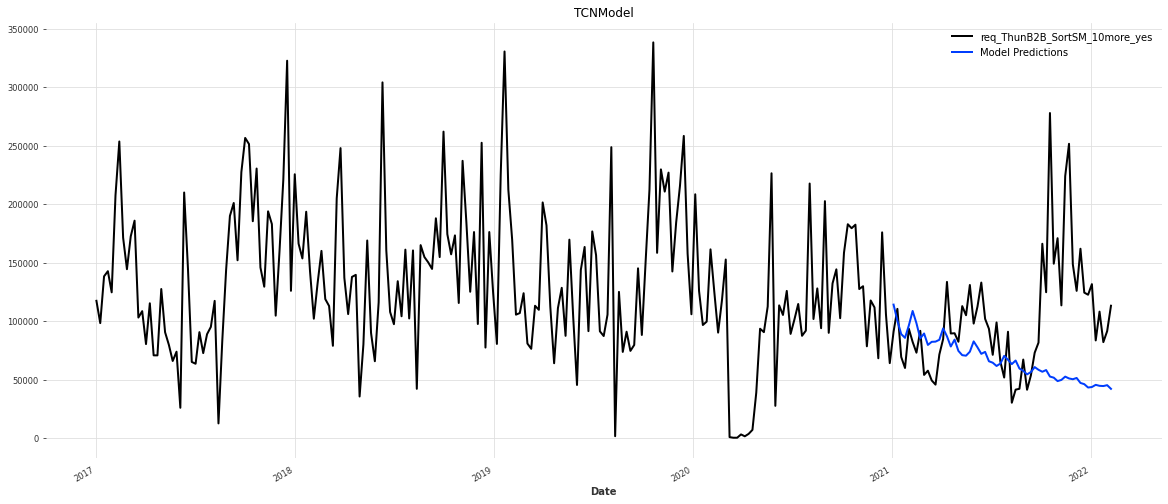

[2022-04-22 13:01:40,078] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-04-22 13:01:40,078] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-04-22 13:01:40,201] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-22 13:01:40,201] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Running for : NBEATSModel
Fitting the Model with Deafults Params : <darts.models.forecasting.nbeats.NBEATSModel object at 0x000001A83D943148>



  | Name      | Type       | Params
-----------------------------------------
0 | criterion | MSELoss    | 0     
1 | stacks    | ModuleList | 6.3 M 
-----------------------------------------
6.3 M     Trainable params
1.5 K     Non-trainable params
6.3 M     Total params
50.072    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

MAPE Loss is : 39.357372621556266
MAE loss  is : 38966.77668855886


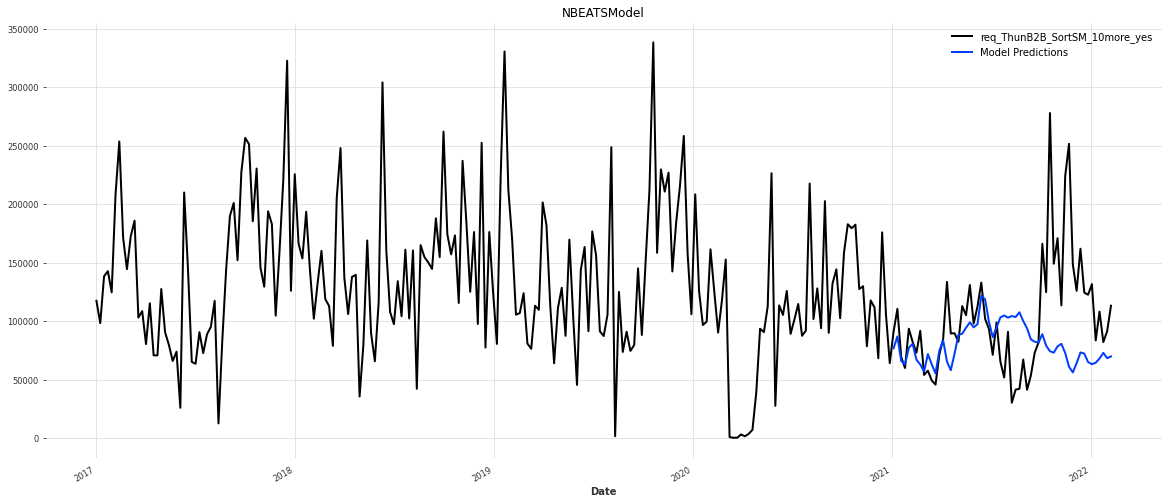

[2022-04-22 13:05:33,585] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
[2022-04-22 13:05:33,585] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 170 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 170 samples.
[2022-04-22 13:05:33,631] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-04-22 13:05:33,631] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             

Running for : TransformerModel
Fitting the Model with Deafults Params : <darts.models.forecasting.transformer_model.TransformerModel object at 0x000001A83C52AE88>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

MAPE Loss is : 99.76667361408126
MAE loss  is : 101410.03858643287


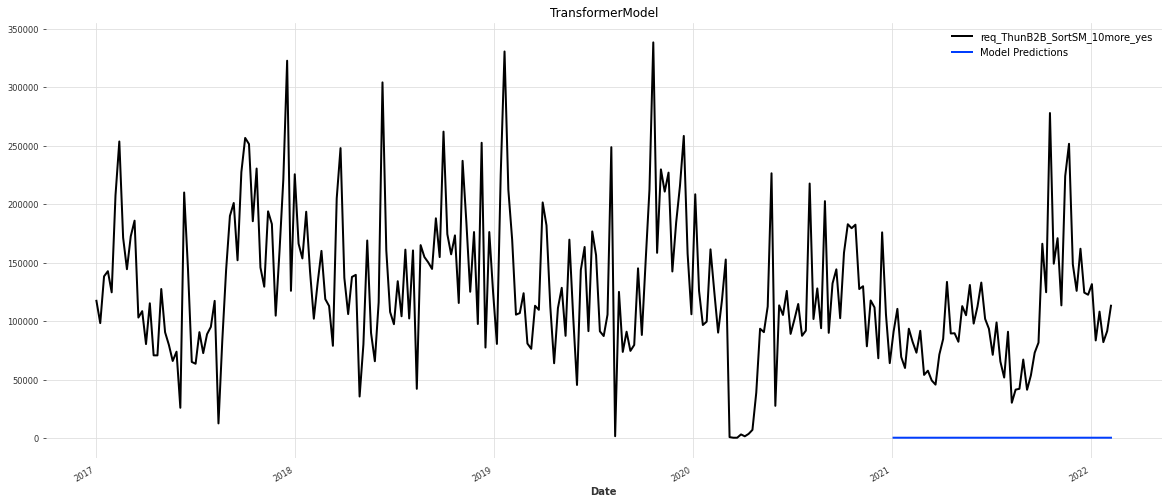

In [13]:
# Initialize the product details
import matplotlib.pyplot as plt
# Define the train function with Wandb Logging properly
def train(series_name):
    
    ## Create the directory  for our files
          try:
            os.makedirs("C:\\Users\\ashwini.kumar\\Time_Series_Modelling\\Outputs\\" + series_name)
          except OSError:
            pass
    
        # Define an empty Dataframe
          df = pd.DataFrame()
 # your model training code here


          for num,model_type in enumerate([AutoARIMA(), Prophet(), ExponentialSmoothing(),  FFT(),
                              RNNModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0),
                              TCNModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0),
                              NBEATSModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0),
                              TransformerModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0)
                           ]):
        
            list_model_names = ["AutoArima",'prophet',"ExponentialSmoothing",  "FFT",
                              "RNNModel",
                              "TCNModel",
                              "NBEATSModel",
                              "TransformerModel"]
            
            print ("Running for :",list_model_names[num])
#             print (str(model_type))
            model = model_type
            print ("Fitting the Model with Deafults Params :",model_type)
            # Fit the model on training data 
            model_req = model.fit(train_data)
            #Make the prediction for 58 observation on train Data
            pred_air = model_req.predict(n = 58)
            
#             print (pred_air)
            # Predict the data for Backtesting
#             if num <= 4:
#                 pred_backtest = model.historical_forecasts(timeseries_input,
#                   start=pd.Timestamp("2020-12-28"),  forecast_horizon=4)
#             else:
#                 pred_backtest = model.historical_forecasts(timeseries_input,
#                   start=pd.Timestamp("2020-12-28"),  forecast_horizon=8, retrain=False)
#             print (pred_backtest)
#             print (len(pred_backtest))
            # Calculate the loss off model
            loss_model = mae(val_data , pred_air)
            #Calculate the loss of bencmark model
            loss_mape = mape(val_data , pred_air)
            # Calculate the loss off backtesting
#             loss_backtesting = mae(val_data,pred_backtest)
            # Print the loss function for benchmark data
            print ("MAPE Loss is :", loss_mape) 
            # Print the loss function for benchmark data
            print ("MAE loss  is :", loss_model)      
            # Print the loss function for benchmark data
#             print ("Model Backtest Loss is :", loss_backtesting)  
            ## Add values to Dataframe
            df.loc[num, 'model'] = model_type
            df.loc[num,'loss_mape'] = loss_mape
#             df.loc[num,'loss_backtesting'] = loss_backtesting
            df.loc[num,'loss_mae'] = loss_model
            # Initialize the plotting variables
            
            df.to_csv("C:\\Users\\ashwini.kumar\\Time_Series_Modelling\\Outputs\\" + series_name+"/valid_data.csv")
            plt.figure() 
            # Set the image size
            plt.rcParams["figure.figsize"] = (20,8)
            # Plot the actual time series data
            timeseries_input.plot()
            # Plot the prediction made
            pred_air.plot(label='Model Predictions', low_quantile=0.05, high_quantile=0.95)
#             pred_backtest.plot(label='Backtesting Predictions', low_quantile=0.05, high_quantile=0.95)
            plt.legend()
            plt.title(list_model_names[num])
            
            plt.savefig("C:\\Users\\ashwini.kumar\\Time_Series_Modelling\\Outputs\\" + series_name + "/" + str(list_model_names[num]) + '.png')
            plt.show()

         


# The function to define the train_data input data and other functions
def call_timeseries(train_column):
    timeseries_input = df_to_timeseries(df,"Date",train_column)
    
    kernel = ExpSineSquared()
    # kernel = RBF()

    gpf = GaussianProcessFilter( kernel=kernel, alpha=0.4 / 2, n_restarts_optimizer=100)
    
    filtered_x = gpf.filter(df_to_timeseries(df,"Date",train_column))
                            
    plt.figure(figsize=[12, 8])
    timeseries_input.plot(color="red", label="Noisy Time Series")
    filtered_x.plot(color="blue", label="Filtered Time Series")
    plt.legend()

    # Split the filtered data into train & validation train_data is useful
    

    train_data , val_data_split = filtered_x.split_before(pd.Timestamp('2021-01-04'))

#     benchmark_input = df_to_timeseries(df,"Date",benchmark_column)
    # Set aside the data since 2021 
    train_data_split, val_data = timeseries_input.split_before(pd.Timestamp('2021-01-04'))

#     train_benchmark_ignore, benchmark_data = benchmark_input.split_before(pd.Timestamp('2021-01-04'))
    
    return train_data,val_data,timeseries_input


# train_series = ["req_ThunB2B_Sorter", "req_ThunB2C","req_ThunB2B_AA", "req_ThunB2B_PP",'Sum_All_Variables' ]
# benchmark_series = ["BOL_B2B Sorter Thun", "BOL_B2C Thun","BOL_B2B AA Thun", "BOL_B2B P&P Thun",'Sum_All_Variables_Benchmark']

train_series = ["req_ThunB2B_Sort_BVB","req_ThunB2B_Sort_SM","req_ThunB2B_SortSM_10more_no","req_ThunB2B_SortSM_10more_yes"]


for i in range(len(train_series)):
    
    print ("Running for " , train_series[i])
    train_data,val_data,timeseries_input = call_timeseries(train_series[i])
    print ("Call the training function")
    train(train_series[i])